# Program Description: Machine Learning Modeling (CNN-Classification, Module 10)

## Overview:
This module is responsible for building a **classification** model using a Convolutional Neural Network (CNN). It works in parallel with other network models. The goal is to train the CNN model, save the best-performing model, and make predictions.

- **Input Dataset**: This module reads the dataset output by **Module 9** (normalized data).
- **Model Type**: The model used in this module is a **CNN (Convolutional Neural Network)**, which is trained for classification tasks.
- **Prediction**: After training, the model is used to make predictions on the test set.

## Key Steps:
1. **Read Data**: 
   - The features and labels for training, validation, and test datasets are read from the files output by **Module 9**.
   
2. **Build CNN Model**: 
   - A CNN model is constructed for classification.
   
3. **Train and Save the Best Model**: 
   - The model is trained on the training dataset, and the best model is saved after training.
   
4. **Model Prediction**: 
   - The trained model is used to make predictions on the test set.

5. **Output**:
   - The trained model and evaluation metrics are saved in the `datasets-ml` folder.
   - The model filename includes the timestamp to differentiate between runs (e.g., `CNNmodel-{current_time}.h5`).

## Output:
- **Model File**: The trained CNN model is saved in the `datasets-ml` folder with the filename `CNNmodel-{current_time}.h5`, where `{current_time}` represents the timestamp of the model save.
- **Log Files**: The log file will contain training progress, evaluation metrics, and other relevant details.


contacts：zhaohf@ihep.ac.cn

# Import libraries

In [1]:
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import mean_squared_error, r2_score
import os
import logging
import numpy as np
import joblib
import tensorflow as tf
import keras.callbacks
import matplotlib.pyplot as plt
import seaborn as sns
import sys
from tensorflow.keras.utils import plot_model
from IPython.display import Image, display

2025-01-21 10:03:03.888002: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


##  Version Information

In [2]:
def get_python_version():
    return sys.version
def get_package_version(package_name):
    try:
        module = __import__(package_name)
        version = getattr(module, '__version__', None)
        if version:
            return version
        else:
            return pkg_resources.get_distribution(package_name).version
    except (ImportError, AttributeError, pkg_resources.DistributionNotFound):
        return "Version info not found"

packages = ['tensorflow', 'numpy', 'joblib', 'matplotlib','seaborn','sklearn']
for package in packages:
    print(f"{package}: {get_package_version(package)}")
print(f"Python: {get_python_version()}")

tensorflow: 2.9.1
numpy: 1.23.5
joblib: 1.4.0
matplotlib: 3.7.5
seaborn: 0.13.2
sklearn: 1.3.2
Python: 3.8.15 | packaged by conda-forge | (default, Nov 22 2022, 08:46:39) 
[GCC 10.4.0]


# Parameter Settings 

## Input File Path:
- `dir_data`: Specifies the directory where the dataset (features and labels for training, validation, and test) is located.
- The dataset includes **training**, **validation**, and **test** datasets generated by **Module 9**.
- Example: `'0926-datasets/datasets(JmolNN)-pre-xmu-cn'` (path to the dataset).

## Output File Path:
- `dir_output`: The directory where the trained model and other output files will be saved.
- The output includes the model file (`CNNmodel-{current_time}.h5`) and logs.
- Example: `'0926-datasets-ml/ml-cn-xmu-(JmolNN)'` (path where the model and log files will be saved).

In [3]:
# Set input file path
dir_data = '0926-datasets/datasets(JmolNN)-pre-xmu-cn'
# Set output file save path
output_path = '0926-datasets-ml/ml-cn-xmu-(JmolNN)'
current_time = datetime.now().strftime("%Y%m%d_%H%M")
# Output save file name and add timestamp
dir_output=os.path.join(output_path,f'CNNmodel-{current_time}')
# Check if the input path exists
if os.path.exists(dir_data):
    print(f"File '{dir_data}' exists.")
else:
    raise FileNotFoundError(f"File '{dir_data}' does not exist.")
os.makedirs(dir_output, exist_ok=True)
os.makedirs(dir_output, exist_ok=True)
# Load training, validation, and test datasets
file_train_feature = os.path.join(dir_data, 'xmu_train_JmolNN.txt')
file_train_label = os.path.join(dir_data, 'label_cn_train_JmolNN.txt')
file_valid_feature = os.path.join(dir_data, 'xmu_valid_JmolNN.txt')
file_valid_label = os.path.join(dir_data, 'label_cn_valid_JmolNN.txt')
file_test_feature = os.path.join(dir_data, 'xmu_test_JmolNN.txt')
file_test_label = os.path.join(dir_data, 'label_cn_test_JmolNN.txt')
log_file_path = os.path.join(dir_output, 'training_log.txt')
logging.basicConfig(level=logging.INFO, format='%(message)s', handlers=[logging.FileHandler(log_file_path), logging.StreamHandler()])
# Read data
X_train = np.loadtxt(file_train_feature)
y_train = np.loadtxt(file_train_label, dtype=float)
X_valid = np.loadtxt(file_valid_feature)
y_valid = np.loadtxt(file_valid_label, dtype=float)
X_test = np.loadtxt(file_test_feature)
y_test = np.loadtxt(file_test_label, dtype=float)
# Prepare messages for dataset sizes
train_size_message = f"Training set size: X_train: {X_train.shape}, y_train: {y_train.shape}"
valid_size_message = f"Validation set size: X_valid: {X_valid.shape}, y_valid: {y_valid.shape}"
test_size_message = f"Test set size: X_test: {X_test.shape}, y_test: {y_test.shape}"
print(train_size_message)
print(valid_size_message)
print(test_size_message)
# Log dataset sizes
logging.info(train_size_message)
logging.info(valid_size_message)
logging.info(test_size_message)
print("Unique labels in y_train:", np.unique(y_train))
print("Unique labels in y_valid:", np.unique(y_valid))
print("Unique labels in y_test:", np.unique(y_test))


File '0926-datasets/datasets(JmolNN)-pre-xmu-cn' exists.


Training set size: X_train: (3465, 1000), y_train: (3465,)
Validation set size: X_valid: (990, 1000), y_valid: (990,)
Test set size: X_test: (495, 1000), y_test: (495,)


Training set size: X_train: (3465, 1000), y_train: (3465,)
Validation set size: X_valid: (990, 1000), y_valid: (990,)
Test set size: X_test: (495, 1000), y_test: (495,)
Unique labels in y_train: [ 3.  4.  5.  6.  7.  8.  9. 10. 11. 12.]
Unique labels in y_valid: [ 3.  4.  5.  6.  7.  8.  9. 10. 11. 12.]
Unique labels in y_test: [ 2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12.]


# Build a MLP classification model and save the best model results

In [4]:
# Check the unique values and range of the labels
print("Unique labels in y_train:", np.unique(y_train))
print("Unique labels in y_valid:", np.unique(y_valid))
print("Unique labels in y_test:", np.unique(y_test))
logging.info(f"Unique labels in y_train: {np.unique(y_train)}")
logging.info(f"Unique labels in y_valid: {np.unique(y_valid)}")
logging.info(f"Unique labels in y_test: {np.unique(y_test)}")
# Determine the number of classes and the minimum label value
all_labels = np.concatenate((y_train, y_valid, y_test))
num_classes = len(np.unique(all_labels))
min_label = np.min(all_labels)
# Convert labels to one-hot encoding
y_train = to_categorical(y_train - min_label, num_classes=num_classes)
y_valid = to_categorical(y_valid - min_label, num_classes=num_classes)
y_test = to_categorical(y_test - min_label, num_classes=num_classes)
# Build the deep learning model
#model = tf.keras.Sequential([
    #tf.keras.layers.Dense(100, activation='relu', input_shape=(X_train.shape[1],)),
    #tf.keras.layers.Dense(50, activation='relu'),
    #tf.keras.layers.Dense(num_classes, activation='softmax')  # 输出层，分类问题使用softmax激活函数
#])
model = tf.keras.Sequential([
    tf.keras.layers.Dense(512, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.2),  # Add Dropout layer
    tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)),# 添加L2正则化
    #tf.keras.layers.Dropout(0.2),  # Add Dropout layer
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),  # 添加L2正则化
    #tf.keras.layers.Dropout(0.2), 
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),  # 添加L2正则化
    #tf.keras.layers.Dropout(0.2), 
    tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001)),  # 添加L2正则化
    tf.keras.layers.Dense(num_classes, activation='softmax')
])
# Customize callback class for logging
class CustomCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        log_message = (f"Epoch {epoch + 1}, "
                       f"Loss: {logs['loss']:.4f}, "
                       f"Accuracy: {logs['accuracy']:.4f}, "
                       f"Val_Loss: {logs['val_loss']:.4f}, "
                       f"Val_Accuracy: {logs['val_accuracy']:.4f}")
        logging.info(log_message)
# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer='adam',
              loss='categorical_crossentropy',  # Classification problem uses cross entropy loss function
              metrics=['accuracy','mae']) # Accuracy as an evaluation metric
# Save the best model
model_file = os.path.join(dir_output, 'best_model.h5')
model.save(model_file)
print(f"Best model saved to: {model_file}")
checkpoint = ModelCheckpoint(model_file, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
# Train the model
history = model.fit(X_train, y_train,
                    epochs=150,
                    batch_size=32,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint, CustomCallback()],
                    verbose=1)

# Evaluate model performance
loss, accuracy,mae = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')


Unique labels in y_train: [ 3.  4.  5.  6.  7.  8.  9. 10. 11. 12.]
Unique labels in y_valid: [ 3.  4.  5.  6.  7.  8.  9. 10. 11. 12.]
Unique labels in y_test: [ 2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12.]


Unique labels in y_train: [ 3.  4.  5.  6.  7.  8.  9. 10. 11. 12.]
Unique labels in y_valid: [ 3.  4.  5.  6.  7.  8.  9. 10. 11. 12.]
Unique labels in y_test: [ 2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12.]


2025-01-21 10:03:08.544981: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Best model saved to: 0926-datasets-ml/ml-cn-xmu-(JmolNN)/CNNmodel-20250121_1003/best_model.h5
Epoch 1/150
107/109 [============================>.] - ETA: 0s - loss: 2.0205 - accuracy: 0.3940 - mae: 0.1231
Epoch 1: val_accuracy improved from -inf to 0.41414, saving model to 0926-datasets-ml/ml-cn-xmu-(JmolNN)/CNNmodel-20250121_1003/best_model.h5


Epoch 1, Loss: 2.0179, Accuracy: 0.3951, Val_Loss: 1.8009, Val_Accuracy: 0.4141


109/109 [==============================] - 2s 10ms/step - loss: 2.0179 - accuracy: 0.3951 - mae: 0.1230 - val_loss: 1.8009 - val_accuracy: 0.4141 - val_mae: 0.1196
Epoch 2/150
104/109 [===========================>..] - ETA: 0s - loss: 1.7360 - accuracy: 0.4441 - mae: 0.1171
Epoch 2: val_accuracy did not improve from 0.41414


Epoch 2, Loss: 1.7371, Accuracy: 0.4421, Val_Loss: 1.6880, Val_Accuracy: 0.4040


109/109 [==============================] - 1s 7ms/step - loss: 1.7371 - accuracy: 0.4421 - mae: 0.1172 - val_loss: 1.6880 - val_accuracy: 0.4040 - val_mae: 0.1212
Epoch 3/150
100/109 [==========================>...] - ETA: 0s - loss: 1.6369 - accuracy: 0.4538 - mae: 0.1169
Epoch 3: val_accuracy improved from 0.41414 to 0.45152, saving model to 0926-datasets-ml/ml-cn-xmu-(JmolNN)/CNNmodel-20250121_1003/best_model.h5


Epoch 3, Loss: 1.6314, Accuracy: 0.4528, Val_Loss: 1.6495, Val_Accuracy: 0.4515


109/109 [==============================] - 1s 8ms/step - loss: 1.6314 - accuracy: 0.4528 - mae: 0.1168 - val_loss: 1.6495 - val_accuracy: 0.4515 - val_mae: 0.1160
Epoch 4/150
107/109 [============================>.] - ETA: 0s - loss: 1.5462 - accuracy: 0.4635 - mae: 0.1148
Epoch 4: val_accuracy improved from 0.45152 to 0.45455, saving model to 0926-datasets-ml/ml-cn-xmu-(JmolNN)/CNNmodel-20250121_1003/best_model.h5


Epoch 4, Loss: 1.5442, Accuracy: 0.4652, Val_Loss: 1.5048, Val_Accuracy: 0.4545


109/109 [==============================] - 1s 10ms/step - loss: 1.5442 - accuracy: 0.4652 - mae: 0.1147 - val_loss: 1.5048 - val_accuracy: 0.4545 - val_mae: 0.1159
Epoch 5/150
108/109 [============================>.] - ETA: 0s - loss: 1.4845 - accuracy: 0.4688 - mae: 0.1139
Epoch 5: val_accuracy did not improve from 0.45455


Epoch 5, Loss: 1.4846, Accuracy: 0.4681, Val_Loss: 1.4442, Val_Accuracy: 0.4485


109/109 [==============================] - 1s 9ms/step - loss: 1.4846 - accuracy: 0.4681 - mae: 0.1139 - val_loss: 1.4442 - val_accuracy: 0.4485 - val_mae: 0.1146
Epoch 6/150
105/109 [===========================>..] - ETA: 0s - loss: 1.4244 - accuracy: 0.4702 - mae: 0.1126
Epoch 6: val_accuracy did not improve from 0.45455


Epoch 6, Loss: 1.4248, Accuracy: 0.4701, Val_Loss: 1.4719, Val_Accuracy: 0.4020


109/109 [==============================] - 1s 11ms/step - loss: 1.4248 - accuracy: 0.4701 - mae: 0.1127 - val_loss: 1.4719 - val_accuracy: 0.4020 - val_mae: 0.1190
Epoch 7/150
108/109 [============================>.] - ETA: 0s - loss: 1.3722 - accuracy: 0.4852 - mae: 0.1112
Epoch 7: val_accuracy did not improve from 0.45455


Epoch 7, Loss: 1.3724, Accuracy: 0.4846, Val_Loss: 1.3735, Val_Accuracy: 0.4434


109/109 [==============================] - 1s 11ms/step - loss: 1.3724 - accuracy: 0.4846 - mae: 0.1112 - val_loss: 1.3735 - val_accuracy: 0.4434 - val_mae: 0.1108
Epoch 8/150
108/109 [============================>.] - ETA: 0s - loss: 1.3218 - accuracy: 0.4913 - mae: 0.1098
Epoch 8: val_accuracy improved from 0.45455 to 0.45960, saving model to 0926-datasets-ml/ml-cn-xmu-(JmolNN)/CNNmodel-20250121_1003/best_model.h5


Epoch 8, Loss: 1.3231, Accuracy: 0.4906, Val_Loss: 1.3366, Val_Accuracy: 0.4596


109/109 [==============================] - 1s 10ms/step - loss: 1.3231 - accuracy: 0.4906 - mae: 0.1099 - val_loss: 1.3366 - val_accuracy: 0.4596 - val_mae: 0.1054
Epoch 9/150
104/109 [===========================>..] - ETA: 0s - loss: 1.2799 - accuracy: 0.5036 - mae: 0.1072
Epoch 9: val_accuracy improved from 0.45960 to 0.54444, saving model to 0926-datasets-ml/ml-cn-xmu-(JmolNN)/CNNmodel-20250121_1003/best_model.h5


Epoch 9, Loss: 1.2794, Accuracy: 0.5022, Val_Loss: 1.1885, Val_Accuracy: 0.5444


109/109 [==============================] - 1s 12ms/step - loss: 1.2794 - accuracy: 0.5022 - mae: 0.1072 - val_loss: 1.1885 - val_accuracy: 0.5444 - val_mae: 0.1043
Epoch 10/150
109/109 [==============================] - ETA: 0s - loss: 1.2042 - accuracy: 0.5380 - mae: 0.1030
Epoch 10: val_accuracy improved from 0.54444 to 0.55556, saving model to 0926-datasets-ml/ml-cn-xmu-(JmolNN)/CNNmodel-20250121_1003/best_model.h5


Epoch 10, Loss: 1.2042, Accuracy: 0.5380, Val_Loss: 1.1735, Val_Accuracy: 0.5556


109/109 [==============================] - 1s 12ms/step - loss: 1.2042 - accuracy: 0.5380 - mae: 0.1030 - val_loss: 1.1735 - val_accuracy: 0.5556 - val_mae: 0.1029
Epoch 11/150
104/109 [===========================>..] - ETA: 0s - loss: 1.1540 - accuracy: 0.5505 - mae: 0.0992
Epoch 11: val_accuracy improved from 0.55556 to 0.56566, saving model to 0926-datasets-ml/ml-cn-xmu-(JmolNN)/CNNmodel-20250121_1003/best_model.h5


Epoch 11, Loss: 1.1484, Accuracy: 0.5524, Val_Loss: 1.2039, Val_Accuracy: 0.5657


109/109 [==============================] - 1s 9ms/step - loss: 1.1484 - accuracy: 0.5524 - mae: 0.0988 - val_loss: 1.2039 - val_accuracy: 0.5657 - val_mae: 0.1036
Epoch 12/150
109/109 [==============================] - ETA: 0s - loss: 1.1301 - accuracy: 0.5636 - mae: 0.0976
Epoch 12: val_accuracy did not improve from 0.56566


Epoch 12, Loss: 1.1301, Accuracy: 0.5636, Val_Loss: 1.2484, Val_Accuracy: 0.4828


109/109 [==============================] - 1s 11ms/step - loss: 1.1301 - accuracy: 0.5636 - mae: 0.0976 - val_loss: 1.2484 - val_accuracy: 0.4828 - val_mae: 0.1014
Epoch 13/150
105/109 [===========================>..] - ETA: 0s - loss: 1.1233 - accuracy: 0.5500 - mae: 0.0985
Epoch 13: val_accuracy improved from 0.56566 to 0.59293, saving model to 0926-datasets-ml/ml-cn-xmu-(JmolNN)/CNNmodel-20250121_1003/best_model.h5


Epoch 13, Loss: 1.1205, Accuracy: 0.5506, Val_Loss: 1.0766, Val_Accuracy: 0.5929


109/109 [==============================] - 1s 12ms/step - loss: 1.1205 - accuracy: 0.5506 - mae: 0.0984 - val_loss: 1.0766 - val_accuracy: 0.5929 - val_mae: 0.0931
Epoch 14/150
109/109 [==============================] - ETA: 0s - loss: 1.1014 - accuracy: 0.5752 - mae: 0.0965
Epoch 14: val_accuracy did not improve from 0.59293


Epoch 14, Loss: 1.1014, Accuracy: 0.5752, Val_Loss: 1.0910, Val_Accuracy: 0.5616


109/109 [==============================] - 1s 10ms/step - loss: 1.1014 - accuracy: 0.5752 - mae: 0.0965 - val_loss: 1.0910 - val_accuracy: 0.5616 - val_mae: 0.0916
Epoch 15/150
108/109 [============================>.] - ETA: 0s - loss: 1.0583 - accuracy: 0.5862 - mae: 0.0943
Epoch 15: val_accuracy improved from 0.59293 to 0.60202, saving model to 0926-datasets-ml/ml-cn-xmu-(JmolNN)/CNNmodel-20250121_1003/best_model.h5


Epoch 15, Loss: 1.0585, Accuracy: 0.5864, Val_Loss: 0.9873, Val_Accuracy: 0.6020


109/109 [==============================] - 1s 12ms/step - loss: 1.0585 - accuracy: 0.5864 - mae: 0.0943 - val_loss: 0.9873 - val_accuracy: 0.6020 - val_mae: 0.0875
Epoch 16/150
107/109 [============================>.] - ETA: 0s - loss: 1.0263 - accuracy: 0.5908 - mae: 0.0918
Epoch 16: val_accuracy improved from 0.60202 to 0.61010, saving model to 0926-datasets-ml/ml-cn-xmu-(JmolNN)/CNNmodel-20250121_1003/best_model.h5


Epoch 16, Loss: 1.0255, Accuracy: 0.5911, Val_Loss: 0.9835, Val_Accuracy: 0.6101


109/109 [==============================] - 1s 11ms/step - loss: 1.0255 - accuracy: 0.5911 - mae: 0.0918 - val_loss: 0.9835 - val_accuracy: 0.6101 - val_mae: 0.0884
Epoch 17/150
108/109 [============================>.] - ETA: 0s - loss: 1.0314 - accuracy: 0.5897 - mae: 0.0923
Epoch 17: val_accuracy did not improve from 0.61010


Epoch 17, Loss: 1.0316, Accuracy: 0.5896, Val_Loss: 1.0567, Val_Accuracy: 0.5566


109/109 [==============================] - 1s 8ms/step - loss: 1.0316 - accuracy: 0.5896 - mae: 0.0924 - val_loss: 1.0567 - val_accuracy: 0.5566 - val_mae: 0.0965
Epoch 18/150
107/109 [============================>.] - ETA: 0s - loss: 1.0211 - accuracy: 0.5920 - mae: 0.0929
Epoch 18: val_accuracy did not improve from 0.61010


Epoch 18, Loss: 1.0203, Accuracy: 0.5934, Val_Loss: 0.9907, Val_Accuracy: 0.6091


109/109 [==============================] - 1s 11ms/step - loss: 1.0203 - accuracy: 0.5934 - mae: 0.0928 - val_loss: 0.9907 - val_accuracy: 0.6091 - val_mae: 0.0908
Epoch 19/150
105/109 [===========================>..] - ETA: 0s - loss: 0.9925 - accuracy: 0.5967 - mae: 0.0908
Epoch 19: val_accuracy did not improve from 0.61010


Epoch 19, Loss: 1.0019, Accuracy: 0.5951, Val_Loss: 1.0559, Val_Accuracy: 0.5808


109/109 [==============================] - 1s 11ms/step - loss: 1.0019 - accuracy: 0.5951 - mae: 0.0910 - val_loss: 1.0559 - val_accuracy: 0.5808 - val_mae: 0.0942
Epoch 20/150
106/109 [============================>.] - ETA: 0s - loss: 0.9697 - accuracy: 0.6173 - mae: 0.0886
Epoch 20: val_accuracy did not improve from 0.61010


Epoch 20, Loss: 0.9699, Accuracy: 0.6159, Val_Loss: 0.9693, Val_Accuracy: 0.6081


109/109 [==============================] - 1s 10ms/step - loss: 0.9699 - accuracy: 0.6159 - mae: 0.0887 - val_loss: 0.9693 - val_accuracy: 0.6081 - val_mae: 0.0885
Epoch 21/150
107/109 [============================>.] - ETA: 0s - loss: 0.9776 - accuracy: 0.6066 - mae: 0.0893
Epoch 21: val_accuracy improved from 0.61010 to 0.62020, saving model to 0926-datasets-ml/ml-cn-xmu-(JmolNN)/CNNmodel-20250121_1003/best_model.h5


Epoch 21, Loss: 0.9787, Accuracy: 0.6069, Val_Loss: 0.9551, Val_Accuracy: 0.6202


109/109 [==============================] - 1s 12ms/step - loss: 0.9787 - accuracy: 0.6069 - mae: 0.0893 - val_loss: 0.9551 - val_accuracy: 0.6202 - val_mae: 0.0869
Epoch 22/150
105/109 [===========================>..] - ETA: 0s - loss: 0.9641 - accuracy: 0.6170 - mae: 0.0884
Epoch 22: val_accuracy improved from 0.62020 to 0.65455, saving model to 0926-datasets-ml/ml-cn-xmu-(JmolNN)/CNNmodel-20250121_1003/best_model.h5


Epoch 22, Loss: 0.9591, Accuracy: 0.6173, Val_Loss: 0.8981, Val_Accuracy: 0.6545


109/109 [==============================] - 1s 12ms/step - loss: 0.9591 - accuracy: 0.6173 - mae: 0.0880 - val_loss: 0.8981 - val_accuracy: 0.6545 - val_mae: 0.0838
Epoch 23/150
105/109 [===========================>..] - ETA: 0s - loss: 0.9421 - accuracy: 0.6128 - mae: 0.0859
Epoch 23: val_accuracy did not improve from 0.65455


Epoch 23, Loss: 0.9424, Accuracy: 0.6130, Val_Loss: 0.9154, Val_Accuracy: 0.6505


109/109 [==============================] - 1s 8ms/step - loss: 0.9424 - accuracy: 0.6130 - mae: 0.0860 - val_loss: 0.9154 - val_accuracy: 0.6505 - val_mae: 0.0856
Epoch 24/150
108/109 [============================>.] - ETA: 0s - loss: 0.9303 - accuracy: 0.6343 - mae: 0.0860
Epoch 24: val_accuracy did not improve from 0.65455


Epoch 24, Loss: 0.9301, Accuracy: 0.6346, Val_Loss: 0.9684, Val_Accuracy: 0.6051


109/109 [==============================] - 1s 11ms/step - loss: 0.9301 - accuracy: 0.6346 - mae: 0.0860 - val_loss: 0.9684 - val_accuracy: 0.6051 - val_mae: 0.0873
Epoch 25/150
106/109 [============================>.] - ETA: 0s - loss: 0.9099 - accuracy: 0.6277 - mae: 0.0848
Epoch 25: val_accuracy did not improve from 0.65455


Epoch 25, Loss: 0.9090, Accuracy: 0.6280, Val_Loss: 0.8767, Val_Accuracy: 0.6384


109/109 [==============================] - 1s 11ms/step - loss: 0.9090 - accuracy: 0.6280 - mae: 0.0848 - val_loss: 0.8767 - val_accuracy: 0.6384 - val_mae: 0.0843
Epoch 26/150
104/109 [===========================>..] - ETA: 0s - loss: 0.9437 - accuracy: 0.6223 - mae: 0.0880
Epoch 26: val_accuracy did not improve from 0.65455


Epoch 26, Loss: 0.9437, Accuracy: 0.6214, Val_Loss: 0.8764, Val_Accuracy: 0.6374


109/109 [==============================] - 1s 8ms/step - loss: 0.9437 - accuracy: 0.6214 - mae: 0.0880 - val_loss: 0.8764 - val_accuracy: 0.6374 - val_mae: 0.0837
Epoch 27/150
104/109 [===========================>..] - ETA: 0s - loss: 0.8786 - accuracy: 0.6424 - mae: 0.0829
Epoch 27: val_accuracy did not improve from 0.65455


Epoch 27, Loss: 0.8836, Accuracy: 0.6421, Val_Loss: 0.8885, Val_Accuracy: 0.6434


109/109 [==============================] - 1s 11ms/step - loss: 0.8836 - accuracy: 0.6421 - mae: 0.0831 - val_loss: 0.8885 - val_accuracy: 0.6434 - val_mae: 0.0825
Epoch 28/150
106/109 [============================>.] - ETA: 0s - loss: 0.9071 - accuracy: 0.6330 - mae: 0.0844
Epoch 28: val_accuracy did not improve from 0.65455


Epoch 28, Loss: 0.9046, Accuracy: 0.6346, Val_Loss: 0.8762, Val_Accuracy: 0.6414


109/109 [==============================] - 1s 11ms/step - loss: 0.9046 - accuracy: 0.6346 - mae: 0.0843 - val_loss: 0.8762 - val_accuracy: 0.6414 - val_mae: 0.0856
Epoch 29/150
102/109 [===========================>..] - ETA: 0s - loss: 0.8873 - accuracy: 0.6443 - mae: 0.0832
Epoch 29: val_accuracy did not improve from 0.65455


Epoch 29, Loss: 0.8868, Accuracy: 0.6436, Val_Loss: 0.8879, Val_Accuracy: 0.6495


109/109 [==============================] - 1s 10ms/step - loss: 0.8868 - accuracy: 0.6436 - mae: 0.0833 - val_loss: 0.8879 - val_accuracy: 0.6495 - val_mae: 0.0810
Epoch 30/150
104/109 [===========================>..] - ETA: 0s - loss: 0.8764 - accuracy: 0.6430 - mae: 0.0823
Epoch 30: val_accuracy did not improve from 0.65455


Epoch 30, Loss: 0.8814, Accuracy: 0.6424, Val_Loss: 0.9203, Val_Accuracy: 0.6505


109/109 [==============================] - 1s 11ms/step - loss: 0.8814 - accuracy: 0.6424 - mae: 0.0825 - val_loss: 0.9203 - val_accuracy: 0.6505 - val_mae: 0.0808
Epoch 31/150
109/109 [==============================] - ETA: 0s - loss: 0.8790 - accuracy: 0.6289 - mae: 0.0833
Epoch 31: val_accuracy improved from 0.65455 to 0.66061, saving model to 0926-datasets-ml/ml-cn-xmu-(JmolNN)/CNNmodel-20250121_1003/best_model.h5


Epoch 31, Loss: 0.8790, Accuracy: 0.6289, Val_Loss: 0.8444, Val_Accuracy: 0.6606


109/109 [==============================] - 1s 13ms/step - loss: 0.8790 - accuracy: 0.6289 - mae: 0.0833 - val_loss: 0.8444 - val_accuracy: 0.6606 - val_mae: 0.0808
Epoch 32/150
108/109 [============================>.] - ETA: 0s - loss: 0.8830 - accuracy: 0.6400 - mae: 0.0834
Epoch 32: val_accuracy did not improve from 0.66061


Epoch 32, Loss: 0.8825, Accuracy: 0.6401, Val_Loss: 0.8768, Val_Accuracy: 0.6485


109/109 [==============================] - 1s 10ms/step - loss: 0.8825 - accuracy: 0.6401 - mae: 0.0834 - val_loss: 0.8768 - val_accuracy: 0.6485 - val_mae: 0.0828
Epoch 33/150
107/109 [============================>.] - ETA: 0s - loss: 0.9122 - accuracy: 0.6273 - mae: 0.0857
Epoch 33: val_accuracy did not improve from 0.66061


Epoch 33, Loss: 0.9131, Accuracy: 0.6271, Val_Loss: 0.8589, Val_Accuracy: 0.6525


109/109 [==============================] - 1s 11ms/step - loss: 0.9131 - accuracy: 0.6271 - mae: 0.0858 - val_loss: 0.8589 - val_accuracy: 0.6525 - val_mae: 0.0824
Epoch 34/150
104/109 [===========================>..] - ETA: 0s - loss: 0.8799 - accuracy: 0.6493 - mae: 0.0832
Epoch 34: val_accuracy did not improve from 0.66061


Epoch 34, Loss: 0.8759, Accuracy: 0.6488, Val_Loss: 0.9552, Val_Accuracy: 0.5859


109/109 [==============================] - 1s 11ms/step - loss: 0.8759 - accuracy: 0.6488 - mae: 0.0831 - val_loss: 0.9552 - val_accuracy: 0.5859 - val_mae: 0.0862
Epoch 35/150
104/109 [===========================>..] - ETA: 0s - loss: 0.8994 - accuracy: 0.6331 - mae: 0.0845
Epoch 35: val_accuracy did not improve from 0.66061


Epoch 35, Loss: 0.9005, Accuracy: 0.6329, Val_Loss: 0.9157, Val_Accuracy: 0.6263


109/109 [==============================] - 1s 10ms/step - loss: 0.9005 - accuracy: 0.6329 - mae: 0.0847 - val_loss: 0.9157 - val_accuracy: 0.6263 - val_mae: 0.0875
Epoch 36/150
108/109 [============================>.] - ETA: 0s - loss: 0.8502 - accuracy: 0.6432 - mae: 0.0817
Epoch 36: val_accuracy did not improve from 0.66061


Epoch 36, Loss: 0.8499, Accuracy: 0.6433, Val_Loss: 0.8973, Val_Accuracy: 0.6273


109/109 [==============================] - 1s 11ms/step - loss: 0.8499 - accuracy: 0.6433 - mae: 0.0816 - val_loss: 0.8973 - val_accuracy: 0.6273 - val_mae: 0.0854
Epoch 37/150
108/109 [============================>.] - ETA: 0s - loss: 0.8745 - accuracy: 0.6403 - mae: 0.0829
Epoch 37: val_accuracy did not improve from 0.66061


Epoch 37, Loss: 0.8748, Accuracy: 0.6398, Val_Loss: 0.8596, Val_Accuracy: 0.6374


109/109 [==============================] - 1s 11ms/step - loss: 0.8748 - accuracy: 0.6398 - mae: 0.0829 - val_loss: 0.8596 - val_accuracy: 0.6374 - val_mae: 0.0823
Epoch 38/150
105/109 [===========================>..] - ETA: 0s - loss: 0.8335 - accuracy: 0.6687 - mae: 0.0795
Epoch 38: val_accuracy did not improve from 0.66061


Epoch 38, Loss: 0.8354, Accuracy: 0.6670, Val_Loss: 0.8650, Val_Accuracy: 0.6444


109/109 [==============================] - 1s 10ms/step - loss: 0.8354 - accuracy: 0.6670 - mae: 0.0796 - val_loss: 0.8650 - val_accuracy: 0.6444 - val_mae: 0.0813
Epoch 39/150
107/109 [============================>.] - ETA: 0s - loss: 0.8598 - accuracy: 0.6551 - mae: 0.0812
Epoch 39: val_accuracy improved from 0.66061 to 0.66970, saving model to 0926-datasets-ml/ml-cn-xmu-(JmolNN)/CNNmodel-20250121_1003/best_model.h5


Epoch 39, Loss: 0.8631, Accuracy: 0.6543, Val_Loss: 0.8513, Val_Accuracy: 0.6697


109/109 [==============================] - 1s 12ms/step - loss: 0.8631 - accuracy: 0.6543 - mae: 0.0813 - val_loss: 0.8513 - val_accuracy: 0.6697 - val_mae: 0.0835
Epoch 40/150
106/109 [============================>.] - ETA: 0s - loss: 0.8595 - accuracy: 0.6504 - mae: 0.0836
Epoch 40: val_accuracy did not improve from 0.66970


Epoch 40, Loss: 0.8573, Accuracy: 0.6511, Val_Loss: 0.8118, Val_Accuracy: 0.6697


109/109 [==============================] - 1s 10ms/step - loss: 0.8573 - accuracy: 0.6511 - mae: 0.0835 - val_loss: 0.8118 - val_accuracy: 0.6697 - val_mae: 0.0783
Epoch 41/150
109/109 [==============================] - ETA: 0s - loss: 0.8580 - accuracy: 0.6418 - mae: 0.0810
Epoch 41: val_accuracy did not improve from 0.66970


Epoch 41, Loss: 0.8580, Accuracy: 0.6418, Val_Loss: 0.9106, Val_Accuracy: 0.6333


109/109 [==============================] - 1s 9ms/step - loss: 0.8580 - accuracy: 0.6418 - mae: 0.0810 - val_loss: 0.9106 - val_accuracy: 0.6333 - val_mae: 0.0850
Epoch 42/150
105/109 [===========================>..] - ETA: 0s - loss: 0.8509 - accuracy: 0.6482 - mae: 0.0824
Epoch 42: val_accuracy improved from 0.66970 to 0.67475, saving model to 0926-datasets-ml/ml-cn-xmu-(JmolNN)/CNNmodel-20250121_1003/best_model.h5


Epoch 42, Loss: 0.8504, Accuracy: 0.6473, Val_Loss: 0.8119, Val_Accuracy: 0.6747


109/109 [==============================] - 1s 13ms/step - loss: 0.8504 - accuracy: 0.6473 - mae: 0.0823 - val_loss: 0.8119 - val_accuracy: 0.6747 - val_mae: 0.0776
Epoch 43/150
104/109 [===========================>..] - ETA: 0s - loss: 0.8447 - accuracy: 0.6517 - mae: 0.0801
Epoch 43: val_accuracy did not improve from 0.67475


Epoch 43, Loss: 0.8418, Accuracy: 0.6522, Val_Loss: 0.8237, Val_Accuracy: 0.6717


109/109 [==============================] - 1s 11ms/step - loss: 0.8418 - accuracy: 0.6522 - mae: 0.0799 - val_loss: 0.8237 - val_accuracy: 0.6717 - val_mae: 0.0801
Epoch 44/150
106/109 [============================>.] - ETA: 0s - loss: 0.8263 - accuracy: 0.6677 - mae: 0.0800
Epoch 44: val_accuracy did not improve from 0.67475


Epoch 44, Loss: 0.8235, Accuracy: 0.6684, Val_Loss: 0.8702, Val_Accuracy: 0.6364


109/109 [==============================] - 1s 9ms/step - loss: 0.8235 - accuracy: 0.6684 - mae: 0.0798 - val_loss: 0.8702 - val_accuracy: 0.6364 - val_mae: 0.0802
Epoch 45/150
107/109 [============================>.] - ETA: 0s - loss: 0.8269 - accuracy: 0.6630 - mae: 0.0792
Epoch 45: val_accuracy did not improve from 0.67475


Epoch 45, Loss: 0.8296, Accuracy: 0.6618, Val_Loss: 0.9657, Val_Accuracy: 0.6061


109/109 [==============================] - 1s 11ms/step - loss: 0.8296 - accuracy: 0.6618 - mae: 0.0794 - val_loss: 0.9657 - val_accuracy: 0.6061 - val_mae: 0.0890
Epoch 46/150
107/109 [============================>.] - ETA: 0s - loss: 0.8355 - accuracy: 0.6507 - mae: 0.0804
Epoch 46: val_accuracy did not improve from 0.67475


Epoch 46, Loss: 0.8357, Accuracy: 0.6511, Val_Loss: 0.8582, Val_Accuracy: 0.6485


109/109 [==============================] - 1s 10ms/step - loss: 0.8357 - accuracy: 0.6511 - mae: 0.0804 - val_loss: 0.8582 - val_accuracy: 0.6485 - val_mae: 0.0811
Epoch 47/150
106/109 [============================>.] - ETA: 0s - loss: 0.8368 - accuracy: 0.6459 - mae: 0.0796
Epoch 47: val_accuracy did not improve from 0.67475


Epoch 47, Loss: 0.8403, Accuracy: 0.6450, Val_Loss: 0.8698, Val_Accuracy: 0.6343


109/109 [==============================] - 1s 9ms/step - loss: 0.8403 - accuracy: 0.6450 - mae: 0.0800 - val_loss: 0.8698 - val_accuracy: 0.6343 - val_mae: 0.0874
Epoch 48/150
107/109 [============================>.] - ETA: 0s - loss: 0.8389 - accuracy: 0.6510 - mae: 0.0817
Epoch 48: val_accuracy did not improve from 0.67475


Epoch 48, Loss: 0.8395, Accuracy: 0.6494, Val_Loss: 0.8394, Val_Accuracy: 0.6535


109/109 [==============================] - 1s 9ms/step - loss: 0.8395 - accuracy: 0.6494 - mae: 0.0818 - val_loss: 0.8394 - val_accuracy: 0.6535 - val_mae: 0.0798
Epoch 49/150
109/109 [==============================] - ETA: 0s - loss: 0.8183 - accuracy: 0.6620 - mae: 0.0791
Epoch 49: val_accuracy did not improve from 0.67475


Epoch 49, Loss: 0.8183, Accuracy: 0.6620, Val_Loss: 0.8287, Val_Accuracy: 0.6535


109/109 [==============================] - 1s 9ms/step - loss: 0.8183 - accuracy: 0.6620 - mae: 0.0791 - val_loss: 0.8287 - val_accuracy: 0.6535 - val_mae: 0.0759
Epoch 50/150
108/109 [============================>.] - ETA: 0s - loss: 0.8246 - accuracy: 0.6577 - mae: 0.0789
Epoch 50: val_accuracy did not improve from 0.67475


Epoch 50, Loss: 0.8251, Accuracy: 0.6574, Val_Loss: 0.8620, Val_Accuracy: 0.6515


109/109 [==============================] - 1s 9ms/step - loss: 0.8251 - accuracy: 0.6574 - mae: 0.0789 - val_loss: 0.8620 - val_accuracy: 0.6515 - val_mae: 0.0852
Epoch 51/150
105/109 [===========================>..] - ETA: 0s - loss: 0.8203 - accuracy: 0.6652 - mae: 0.0790
Epoch 51: val_accuracy did not improve from 0.67475


Epoch 51, Loss: 0.8230, Accuracy: 0.6623, Val_Loss: 0.8209, Val_Accuracy: 0.6596


109/109 [==============================] - 1s 9ms/step - loss: 0.8230 - accuracy: 0.6623 - mae: 0.0793 - val_loss: 0.8209 - val_accuracy: 0.6596 - val_mae: 0.0782
Epoch 52/150
109/109 [==============================] - ETA: 0s - loss: 0.8068 - accuracy: 0.6646 - mae: 0.0783
Epoch 52: val_accuracy did not improve from 0.67475


Epoch 52, Loss: 0.8068, Accuracy: 0.6646, Val_Loss: 0.8270, Val_Accuracy: 0.6646


109/109 [==============================] - 1s 9ms/step - loss: 0.8068 - accuracy: 0.6646 - mae: 0.0783 - val_loss: 0.8270 - val_accuracy: 0.6646 - val_mae: 0.0809
Epoch 53/150
105/109 [===========================>..] - ETA: 0s - loss: 0.8019 - accuracy: 0.6631 - mae: 0.0772
Epoch 53: val_accuracy did not improve from 0.67475


Epoch 53, Loss: 0.8037, Accuracy: 0.6609, Val_Loss: 0.8254, Val_Accuracy: 0.6626


109/109 [==============================] - 1s 9ms/step - loss: 0.8037 - accuracy: 0.6609 - mae: 0.0775 - val_loss: 0.8254 - val_accuracy: 0.6626 - val_mae: 0.0807
Epoch 54/150
104/109 [===========================>..] - ETA: 0s - loss: 0.8296 - accuracy: 0.6584 - mae: 0.0806
Epoch 54: val_accuracy did not improve from 0.67475


Epoch 54, Loss: 0.8286, Accuracy: 0.6583, Val_Loss: 0.8496, Val_Accuracy: 0.6293


109/109 [==============================] - 1s 9ms/step - loss: 0.8286 - accuracy: 0.6583 - mae: 0.0805 - val_loss: 0.8496 - val_accuracy: 0.6293 - val_mae: 0.0806
Epoch 55/150
103/109 [===========================>..] - ETA: 0s - loss: 0.7946 - accuracy: 0.6660 - mae: 0.0773
Epoch 55: val_accuracy did not improve from 0.67475


Epoch 55, Loss: 0.7915, Accuracy: 0.6655, Val_Loss: 0.8028, Val_Accuracy: 0.6646


109/109 [==============================] - 1s 7ms/step - loss: 0.7915 - accuracy: 0.6655 - mae: 0.0772 - val_loss: 0.8028 - val_accuracy: 0.6646 - val_mae: 0.0773
Epoch 56/150
103/109 [===========================>..] - ETA: 0s - loss: 0.8160 - accuracy: 0.6578 - mae: 0.0785
Epoch 56: val_accuracy did not improve from 0.67475


Epoch 56, Loss: 0.8125, Accuracy: 0.6580, Val_Loss: 0.8982, Val_Accuracy: 0.6101


109/109 [==============================] - 1s 9ms/step - loss: 0.8125 - accuracy: 0.6580 - mae: 0.0784 - val_loss: 0.8982 - val_accuracy: 0.6101 - val_mae: 0.0815
Epoch 57/150
106/109 [============================>.] - ETA: 0s - loss: 0.8251 - accuracy: 0.6512 - mae: 0.0803
Epoch 57: val_accuracy did not improve from 0.67475


Epoch 57, Loss: 0.8241, Accuracy: 0.6517, Val_Loss: 0.9135, Val_Accuracy: 0.6091


109/109 [==============================] - 1s 9ms/step - loss: 0.8241 - accuracy: 0.6517 - mae: 0.0801 - val_loss: 0.9135 - val_accuracy: 0.6091 - val_mae: 0.0827
Epoch 58/150
106/109 [============================>.] - ETA: 0s - loss: 0.8087 - accuracy: 0.6595 - mae: 0.0789
Epoch 58: val_accuracy did not improve from 0.67475


Epoch 58, Loss: 0.8117, Accuracy: 0.6592, Val_Loss: 0.9678, Val_Accuracy: 0.5980


109/109 [==============================] - 1s 9ms/step - loss: 0.8117 - accuracy: 0.6592 - mae: 0.0791 - val_loss: 0.9678 - val_accuracy: 0.5980 - val_mae: 0.0832
Epoch 59/150
106/109 [============================>.] - ETA: 0s - loss: 0.8054 - accuracy: 0.6621 - mae: 0.0778
Epoch 59: val_accuracy did not improve from 0.67475


Epoch 59, Loss: 0.8081, Accuracy: 0.6606, Val_Loss: 0.7878, Val_Accuracy: 0.6737


109/109 [==============================] - 1s 9ms/step - loss: 0.8081 - accuracy: 0.6606 - mae: 0.0779 - val_loss: 0.7878 - val_accuracy: 0.6737 - val_mae: 0.0763
Epoch 60/150
108/109 [============================>.] - ETA: 0s - loss: 0.7962 - accuracy: 0.6725 - mae: 0.0778
Epoch 60: val_accuracy did not improve from 0.67475


Epoch 60, Loss: 0.7968, Accuracy: 0.6719, Val_Loss: 0.8168, Val_Accuracy: 0.6636


109/109 [==============================] - 1s 9ms/step - loss: 0.7968 - accuracy: 0.6719 - mae: 0.0778 - val_loss: 0.8168 - val_accuracy: 0.6636 - val_mae: 0.0756
Epoch 61/150
103/109 [===========================>..] - ETA: 0s - loss: 0.7994 - accuracy: 0.6644 - mae: 0.0778
Epoch 61: val_accuracy improved from 0.67475 to 0.68182, saving model to 0926-datasets-ml/ml-cn-xmu-(JmolNN)/CNNmodel-20250121_1003/best_model.h5


Epoch 61, Loss: 0.8031, Accuracy: 0.6638, Val_Loss: 0.7987, Val_Accuracy: 0.6818


109/109 [==============================] - 1s 9ms/step - loss: 0.8031 - accuracy: 0.6638 - mae: 0.0780 - val_loss: 0.7987 - val_accuracy: 0.6818 - val_mae: 0.0779
Epoch 62/150
105/109 [===========================>..] - ETA: 0s - loss: 0.8009 - accuracy: 0.6696 - mae: 0.0774
Epoch 62: val_accuracy did not improve from 0.68182


Epoch 62, Loss: 0.7990, Accuracy: 0.6707, Val_Loss: 0.9746, Val_Accuracy: 0.5929


109/109 [==============================] - 1s 9ms/step - loss: 0.7990 - accuracy: 0.6707 - mae: 0.0773 - val_loss: 0.9746 - val_accuracy: 0.5929 - val_mae: 0.0850
Epoch 63/150
102/109 [===========================>..] - ETA: 0s - loss: 0.7786 - accuracy: 0.6762 - mae: 0.0764
Epoch 63: val_accuracy did not improve from 0.68182


Epoch 63, Loss: 0.7809, Accuracy: 0.6733, Val_Loss: 0.8148, Val_Accuracy: 0.6687


109/109 [==============================] - 1s 9ms/step - loss: 0.7809 - accuracy: 0.6733 - mae: 0.0765 - val_loss: 0.8148 - val_accuracy: 0.6687 - val_mae: 0.0787
Epoch 64/150
106/109 [============================>.] - ETA: 0s - loss: 0.7987 - accuracy: 0.6669 - mae: 0.0777
Epoch 64: val_accuracy did not improve from 0.68182


Epoch 64, Loss: 0.7982, Accuracy: 0.6675, Val_Loss: 0.8532, Val_Accuracy: 0.6566


109/109 [==============================] - 1s 9ms/step - loss: 0.7982 - accuracy: 0.6675 - mae: 0.0778 - val_loss: 0.8532 - val_accuracy: 0.6566 - val_mae: 0.0796
Epoch 65/150
105/109 [===========================>..] - ETA: 0s - loss: 0.7911 - accuracy: 0.6830 - mae: 0.0758
Epoch 65: val_accuracy did not improve from 0.68182


Epoch 65, Loss: 0.7941, Accuracy: 0.6817, Val_Loss: 0.8653, Val_Accuracy: 0.6384


109/109 [==============================] - 1s 9ms/step - loss: 0.7941 - accuracy: 0.6817 - mae: 0.0760 - val_loss: 0.8653 - val_accuracy: 0.6384 - val_mae: 0.0811
Epoch 66/150
105/109 [===========================>..] - ETA: 0s - loss: 0.7747 - accuracy: 0.6792 - mae: 0.0764
Epoch 66: val_accuracy did not improve from 0.68182


Epoch 66, Loss: 0.7765, Accuracy: 0.6791, Val_Loss: 0.8017, Val_Accuracy: 0.6657


109/109 [==============================] - 1s 9ms/step - loss: 0.7765 - accuracy: 0.6791 - mae: 0.0765 - val_loss: 0.8017 - val_accuracy: 0.6657 - val_mae: 0.0767
Epoch 67/150
104/109 [===========================>..] - ETA: 0s - loss: 0.7983 - accuracy: 0.6722 - mae: 0.0771
Epoch 67: val_accuracy did not improve from 0.68182


Epoch 67, Loss: 0.8044, Accuracy: 0.6687, Val_Loss: 0.8195, Val_Accuracy: 0.6626


109/109 [==============================] - 1s 9ms/step - loss: 0.8044 - accuracy: 0.6687 - mae: 0.0775 - val_loss: 0.8195 - val_accuracy: 0.6626 - val_mae: 0.0779
Epoch 68/150
107/109 [============================>.] - ETA: 0s - loss: 0.7935 - accuracy: 0.6752 - mae: 0.0778
Epoch 68: val_accuracy did not improve from 0.68182


Epoch 68, Loss: 0.7941, Accuracy: 0.6753, Val_Loss: 0.7800, Val_Accuracy: 0.6737


109/109 [==============================] - 1s 9ms/step - loss: 0.7941 - accuracy: 0.6753 - mae: 0.0780 - val_loss: 0.7800 - val_accuracy: 0.6737 - val_mae: 0.0763
Epoch 69/150
106/109 [============================>.] - ETA: 0s - loss: 0.7943 - accuracy: 0.6736 - mae: 0.0766
Epoch 69: val_accuracy did not improve from 0.68182


Epoch 69, Loss: 0.7948, Accuracy: 0.6727, Val_Loss: 0.8603, Val_Accuracy: 0.6323


109/109 [==============================] - 1s 9ms/step - loss: 0.7948 - accuracy: 0.6727 - mae: 0.0766 - val_loss: 0.8603 - val_accuracy: 0.6323 - val_mae: 0.0818
Epoch 70/150
102/109 [===========================>..] - ETA: 0s - loss: 0.7893 - accuracy: 0.6798 - mae: 0.0770
Epoch 70: val_accuracy did not improve from 0.68182


Epoch 70, Loss: 0.7872, Accuracy: 0.6817, Val_Loss: 0.7739, Val_Accuracy: 0.6697


109/109 [==============================] - 1s 9ms/step - loss: 0.7872 - accuracy: 0.6817 - mae: 0.0768 - val_loss: 0.7739 - val_accuracy: 0.6697 - val_mae: 0.0752
Epoch 71/150
107/109 [============================>.] - ETA: 0s - loss: 0.7881 - accuracy: 0.6741 - mae: 0.0763
Epoch 71: val_accuracy did not improve from 0.68182


Epoch 71, Loss: 0.7914, Accuracy: 0.6716, Val_Loss: 0.9708, Val_Accuracy: 0.5808


109/109 [==============================] - 1s 9ms/step - loss: 0.7914 - accuracy: 0.6716 - mae: 0.0765 - val_loss: 0.9708 - val_accuracy: 0.5808 - val_mae: 0.0852
Epoch 72/150
106/109 [============================>.] - ETA: 0s - loss: 0.8040 - accuracy: 0.6701 - mae: 0.0785
Epoch 72: val_accuracy did not improve from 0.68182


Epoch 72, Loss: 0.8049, Accuracy: 0.6713, Val_Loss: 0.8515, Val_Accuracy: 0.6475


109/109 [==============================] - 1s 8ms/step - loss: 0.8049 - accuracy: 0.6713 - mae: 0.0785 - val_loss: 0.8515 - val_accuracy: 0.6475 - val_mae: 0.0796
Epoch 73/150
108/109 [============================>.] - ETA: 0s - loss: 0.7858 - accuracy: 0.6768 - mae: 0.0768
Epoch 73: val_accuracy did not improve from 0.68182


Epoch 73, Loss: 0.7852, Accuracy: 0.6771, Val_Loss: 0.8107, Val_Accuracy: 0.6737


109/109 [==============================] - 1s 9ms/step - loss: 0.7852 - accuracy: 0.6771 - mae: 0.0768 - val_loss: 0.8107 - val_accuracy: 0.6737 - val_mae: 0.0763
Epoch 74/150
106/109 [============================>.] - ETA: 0s - loss: 0.7730 - accuracy: 0.6745 - mae: 0.0752
Epoch 74: val_accuracy did not improve from 0.68182


Epoch 74, Loss: 0.7710, Accuracy: 0.6773, Val_Loss: 0.8179, Val_Accuracy: 0.6576


109/109 [==============================] - 1s 9ms/step - loss: 0.7710 - accuracy: 0.6773 - mae: 0.0750 - val_loss: 0.8179 - val_accuracy: 0.6576 - val_mae: 0.0770
Epoch 75/150
103/109 [===========================>..] - ETA: 0s - loss: 0.7722 - accuracy: 0.6775 - mae: 0.0754
Epoch 75: val_accuracy did not improve from 0.68182


Epoch 75, Loss: 0.7716, Accuracy: 0.6759, Val_Loss: 0.8006, Val_Accuracy: 0.6727


109/109 [==============================] - 1s 8ms/step - loss: 0.7716 - accuracy: 0.6759 - mae: 0.0753 - val_loss: 0.8006 - val_accuracy: 0.6727 - val_mae: 0.0746
Epoch 76/150
106/109 [============================>.] - ETA: 0s - loss: 0.7971 - accuracy: 0.6716 - mae: 0.0776
Epoch 76: val_accuracy did not improve from 0.68182


Epoch 76, Loss: 0.7972, Accuracy: 0.6724, Val_Loss: 0.8017, Val_Accuracy: 0.6687


109/109 [==============================] - 1s 9ms/step - loss: 0.7972 - accuracy: 0.6724 - mae: 0.0776 - val_loss: 0.8017 - val_accuracy: 0.6687 - val_mae: 0.0800
Epoch 77/150
105/109 [===========================>..] - ETA: 0s - loss: 0.7807 - accuracy: 0.6726 - mae: 0.0757
Epoch 77: val_accuracy did not improve from 0.68182


Epoch 77, Loss: 0.7840, Accuracy: 0.6701, Val_Loss: 0.8616, Val_Accuracy: 0.6374


109/109 [==============================] - 1s 9ms/step - loss: 0.7840 - accuracy: 0.6701 - mae: 0.0759 - val_loss: 0.8616 - val_accuracy: 0.6374 - val_mae: 0.0809
Epoch 78/150
105/109 [===========================>..] - ETA: 0s - loss: 0.7935 - accuracy: 0.6679 - mae: 0.0775
Epoch 78: val_accuracy did not improve from 0.68182


Epoch 78, Loss: 0.7921, Accuracy: 0.6672, Val_Loss: 0.8423, Val_Accuracy: 0.6444


109/109 [==============================] - 1s 8ms/step - loss: 0.7921 - accuracy: 0.6672 - mae: 0.0775 - val_loss: 0.8423 - val_accuracy: 0.6444 - val_mae: 0.0815
Epoch 79/150
107/109 [============================>.] - ETA: 0s - loss: 0.7783 - accuracy: 0.6729 - mae: 0.0768
Epoch 79: val_accuracy did not improve from 0.68182


Epoch 79, Loss: 0.7800, Accuracy: 0.6716, Val_Loss: 0.8638, Val_Accuracy: 0.6475


109/109 [==============================] - 1s 9ms/step - loss: 0.7800 - accuracy: 0.6716 - mae: 0.0769 - val_loss: 0.8638 - val_accuracy: 0.6475 - val_mae: 0.0787
Epoch 80/150
102/109 [===========================>..] - ETA: 0s - loss: 0.7617 - accuracy: 0.6795 - mae: 0.0746
Epoch 80: val_accuracy did not improve from 0.68182


Epoch 80, Loss: 0.7595, Accuracy: 0.6791, Val_Loss: 0.7870, Val_Accuracy: 0.6778


109/109 [==============================] - 1s 9ms/step - loss: 0.7595 - accuracy: 0.6791 - mae: 0.0746 - val_loss: 0.7870 - val_accuracy: 0.6778 - val_mae: 0.0740
Epoch 81/150
102/109 [===========================>..] - ETA: 0s - loss: 0.8001 - accuracy: 0.6605 - mae: 0.0776
Epoch 81: val_accuracy did not improve from 0.68182


Epoch 81, Loss: 0.7972, Accuracy: 0.6618, Val_Loss: 0.9291, Val_Accuracy: 0.5919


109/109 [==============================] - 1s 8ms/step - loss: 0.7972 - accuracy: 0.6618 - mae: 0.0774 - val_loss: 0.9291 - val_accuracy: 0.5919 - val_mae: 0.0838
Epoch 82/150
107/109 [============================>.] - ETA: 0s - loss: 0.7696 - accuracy: 0.6779 - mae: 0.0762
Epoch 82: val_accuracy did not improve from 0.68182


Epoch 82, Loss: 0.7694, Accuracy: 0.6782, Val_Loss: 0.7973, Val_Accuracy: 0.6616


109/109 [==============================] - 1s 8ms/step - loss: 0.7694 - accuracy: 0.6782 - mae: 0.0762 - val_loss: 0.7973 - val_accuracy: 0.6616 - val_mae: 0.0772
Epoch 83/150
105/109 [===========================>..] - ETA: 0s - loss: 0.7697 - accuracy: 0.6827 - mae: 0.0754
Epoch 83: val_accuracy did not improve from 0.68182


Epoch 83, Loss: 0.7716, Accuracy: 0.6814, Val_Loss: 0.8236, Val_Accuracy: 0.6556


109/109 [==============================] - 1s 9ms/step - loss: 0.7716 - accuracy: 0.6814 - mae: 0.0755 - val_loss: 0.8236 - val_accuracy: 0.6556 - val_mae: 0.0774
Epoch 84/150
103/109 [===========================>..] - ETA: 0s - loss: 0.7634 - accuracy: 0.6799 - mae: 0.0746
Epoch 84: val_accuracy did not improve from 0.68182


Epoch 84, Loss: 0.7663, Accuracy: 0.6779, Val_Loss: 0.8697, Val_Accuracy: 0.6323


109/109 [==============================] - 1s 9ms/step - loss: 0.7663 - accuracy: 0.6779 - mae: 0.0746 - val_loss: 0.8697 - val_accuracy: 0.6323 - val_mae: 0.0780
Epoch 85/150
108/109 [============================>.] - ETA: 0s - loss: 0.7643 - accuracy: 0.6803 - mae: 0.0753
Epoch 85: val_accuracy did not improve from 0.68182


Epoch 85, Loss: 0.7643, Accuracy: 0.6802, Val_Loss: 0.8367, Val_Accuracy: 0.6333


109/109 [==============================] - 1s 8ms/step - loss: 0.7643 - accuracy: 0.6802 - mae: 0.0753 - val_loss: 0.8367 - val_accuracy: 0.6333 - val_mae: 0.0811
Epoch 86/150
103/109 [===========================>..] - ETA: 0s - loss: 0.7552 - accuracy: 0.6833 - mae: 0.0746
Epoch 86: val_accuracy did not improve from 0.68182


Epoch 86, Loss: 0.7558, Accuracy: 0.6837, Val_Loss: 0.8519, Val_Accuracy: 0.6525


109/109 [==============================] - 1s 10ms/step - loss: 0.7558 - accuracy: 0.6837 - mae: 0.0744 - val_loss: 0.8519 - val_accuracy: 0.6525 - val_mae: 0.0785
Epoch 87/150
103/109 [===========================>..] - ETA: 0s - loss: 0.7641 - accuracy: 0.6896 - mae: 0.0746
Epoch 87: val_accuracy did not improve from 0.68182


Epoch 87, Loss: 0.7632, Accuracy: 0.6909, Val_Loss: 0.8143, Val_Accuracy: 0.6606


109/109 [==============================] - 1s 9ms/step - loss: 0.7632 - accuracy: 0.6909 - mae: 0.0746 - val_loss: 0.8143 - val_accuracy: 0.6606 - val_mae: 0.0765
Epoch 88/150
102/109 [===========================>..] - ETA: 0s - loss: 0.7467 - accuracy: 0.6884 - mae: 0.0733
Epoch 88: val_accuracy did not improve from 0.68182


Epoch 88, Loss: 0.7489, Accuracy: 0.6874, Val_Loss: 0.7809, Val_Accuracy: 0.6788


109/109 [==============================] - 1s 8ms/step - loss: 0.7489 - accuracy: 0.6874 - mae: 0.0736 - val_loss: 0.7809 - val_accuracy: 0.6788 - val_mae: 0.0770
Epoch 89/150
105/109 [===========================>..] - ETA: 0s - loss: 0.7488 - accuracy: 0.6833 - mae: 0.0740
Epoch 89: val_accuracy did not improve from 0.68182


Epoch 89, Loss: 0.7475, Accuracy: 0.6837, Val_Loss: 0.9009, Val_Accuracy: 0.6222


109/109 [==============================] - 1s 9ms/step - loss: 0.7475 - accuracy: 0.6837 - mae: 0.0739 - val_loss: 0.9009 - val_accuracy: 0.6222 - val_mae: 0.0802
Epoch 90/150
104/109 [===========================>..] - ETA: 0s - loss: 0.7525 - accuracy: 0.6833 - mae: 0.0738
Epoch 90: val_accuracy did not improve from 0.68182


Epoch 90, Loss: 0.7561, Accuracy: 0.6797, Val_Loss: 0.8033, Val_Accuracy: 0.6626


109/109 [==============================] - 1s 9ms/step - loss: 0.7561 - accuracy: 0.6797 - mae: 0.0740 - val_loss: 0.8033 - val_accuracy: 0.6626 - val_mae: 0.0752
Epoch 91/150
102/109 [===========================>..] - ETA: 0s - loss: 0.7919 - accuracy: 0.6765 - mae: 0.0773
Epoch 91: val_accuracy did not improve from 0.68182


Epoch 91, Loss: 0.7839, Accuracy: 0.6831, Val_Loss: 0.7762, Val_Accuracy: 0.6677


109/109 [==============================] - 1s 9ms/step - loss: 0.7839 - accuracy: 0.6831 - mae: 0.0768 - val_loss: 0.7762 - val_accuracy: 0.6677 - val_mae: 0.0757
Epoch 92/150
108/109 [============================>.] - ETA: 0s - loss: 0.7449 - accuracy: 0.6875 - mae: 0.0727
Epoch 92: val_accuracy did not improve from 0.68182


Epoch 92, Loss: 0.7449, Accuracy: 0.6874, Val_Loss: 0.7934, Val_Accuracy: 0.6818


109/109 [==============================] - 1s 10ms/step - loss: 0.7449 - accuracy: 0.6874 - mae: 0.0727 - val_loss: 0.7934 - val_accuracy: 0.6818 - val_mae: 0.0749
Epoch 93/150
108/109 [============================>.] - ETA: 0s - loss: 0.7882 - accuracy: 0.6580 - mae: 0.0780
Epoch 93: val_accuracy did not improve from 0.68182


Epoch 93, Loss: 0.7874, Accuracy: 0.6583, Val_Loss: 0.8113, Val_Accuracy: 0.6697


109/109 [==============================] - 1s 9ms/step - loss: 0.7874 - accuracy: 0.6583 - mae: 0.0780 - val_loss: 0.8113 - val_accuracy: 0.6697 - val_mae: 0.0756
Epoch 94/150
103/109 [===========================>..] - ETA: 0s - loss: 0.7577 - accuracy: 0.6775 - mae: 0.0739
Epoch 94: val_accuracy improved from 0.68182 to 0.68384, saving model to 0926-datasets-ml/ml-cn-xmu-(JmolNN)/CNNmodel-20250121_1003/best_model.h5


Epoch 94, Loss: 0.7646, Accuracy: 0.6739, Val_Loss: 0.7909, Val_Accuracy: 0.6838


109/109 [==============================] - 1s 10ms/step - loss: 0.7646 - accuracy: 0.6739 - mae: 0.0743 - val_loss: 0.7909 - val_accuracy: 0.6838 - val_mae: 0.0766
Epoch 95/150
107/109 [============================>.] - ETA: 0s - loss: 0.7467 - accuracy: 0.6960 - mae: 0.0740
Epoch 95: val_accuracy did not improve from 0.68384


Epoch 95, Loss: 0.7480, Accuracy: 0.6952, Val_Loss: 0.7775, Val_Accuracy: 0.6747


109/109 [==============================] - 1s 9ms/step - loss: 0.7480 - accuracy: 0.6952 - mae: 0.0741 - val_loss: 0.7775 - val_accuracy: 0.6747 - val_mae: 0.0733
Epoch 96/150
108/109 [============================>.] - ETA: 0s - loss: 0.7602 - accuracy: 0.6800 - mae: 0.0746
Epoch 96: val_accuracy did not improve from 0.68384


Epoch 96, Loss: 0.7609, Accuracy: 0.6791, Val_Loss: 0.8355, Val_Accuracy: 0.6677


109/109 [==============================] - 1s 8ms/step - loss: 0.7609 - accuracy: 0.6791 - mae: 0.0747 - val_loss: 0.8355 - val_accuracy: 0.6677 - val_mae: 0.0778
Epoch 97/150
104/109 [===========================>..] - ETA: 0s - loss: 0.7498 - accuracy: 0.6908 - mae: 0.0739
Epoch 97: val_accuracy did not improve from 0.68384


Epoch 97, Loss: 0.7442, Accuracy: 0.6924, Val_Loss: 0.8008, Val_Accuracy: 0.6697


109/109 [==============================] - 1s 9ms/step - loss: 0.7442 - accuracy: 0.6924 - mae: 0.0737 - val_loss: 0.8008 - val_accuracy: 0.6697 - val_mae: 0.0755
Epoch 98/150
108/109 [============================>.] - ETA: 0s - loss: 0.7407 - accuracy: 0.6869 - mae: 0.0720
Epoch 98: val_accuracy did not improve from 0.68384


Epoch 98, Loss: 0.7403, Accuracy: 0.6872, Val_Loss: 0.8781, Val_Accuracy: 0.6333


109/109 [==============================] - 1s 9ms/step - loss: 0.7403 - accuracy: 0.6872 - mae: 0.0720 - val_loss: 0.8781 - val_accuracy: 0.6333 - val_mae: 0.0782
Epoch 99/150
104/109 [===========================>..] - ETA: 0s - loss: 0.7611 - accuracy: 0.6851 - mae: 0.0745
Epoch 99: val_accuracy did not improve from 0.68384


Epoch 99, Loss: 0.7598, Accuracy: 0.6854, Val_Loss: 0.7965, Val_Accuracy: 0.6707


109/109 [==============================] - 1s 8ms/step - loss: 0.7598 - accuracy: 0.6854 - mae: 0.0746 - val_loss: 0.7965 - val_accuracy: 0.6707 - val_mae: 0.0750
Epoch 100/150
106/109 [============================>.] - ETA: 0s - loss: 0.7404 - accuracy: 0.6972 - mae: 0.0728
Epoch 100: val_accuracy did not improve from 0.68384


Epoch 100, Loss: 0.7435, Accuracy: 0.6958, Val_Loss: 0.7689, Val_Accuracy: 0.6808


109/109 [==============================] - 1s 8ms/step - loss: 0.7435 - accuracy: 0.6958 - mae: 0.0730 - val_loss: 0.7689 - val_accuracy: 0.6808 - val_mae: 0.0745
Epoch 101/150
107/109 [============================>.] - ETA: 0s - loss: 0.7511 - accuracy: 0.6872 - mae: 0.0743
Epoch 101: val_accuracy did not improve from 0.68384


Epoch 101, Loss: 0.7501, Accuracy: 0.6869, Val_Loss: 0.8480, Val_Accuracy: 0.6556


109/109 [==============================] - 1s 9ms/step - loss: 0.7501 - accuracy: 0.6869 - mae: 0.0742 - val_loss: 0.8480 - val_accuracy: 0.6556 - val_mae: 0.0762
Epoch 102/150
102/109 [===========================>..] - ETA: 0s - loss: 0.7426 - accuracy: 0.6863 - mae: 0.0734
Epoch 102: val_accuracy did not improve from 0.68384


Epoch 102, Loss: 0.7462, Accuracy: 0.6854, Val_Loss: 0.8009, Val_Accuracy: 0.6727


109/109 [==============================] - 1s 8ms/step - loss: 0.7462 - accuracy: 0.6854 - mae: 0.0737 - val_loss: 0.8009 - val_accuracy: 0.6727 - val_mae: 0.0772
Epoch 103/150
109/109 [==============================] - ETA: 0s - loss: 0.7472 - accuracy: 0.6889 - mae: 0.0734
Epoch 103: val_accuracy did not improve from 0.68384


Epoch 103, Loss: 0.7472, Accuracy: 0.6889, Val_Loss: 0.8647, Val_Accuracy: 0.6455


109/109 [==============================] - 1s 9ms/step - loss: 0.7472 - accuracy: 0.6889 - mae: 0.0734 - val_loss: 0.8647 - val_accuracy: 0.6455 - val_mae: 0.0790
Epoch 104/150
103/109 [===========================>..] - ETA: 0s - loss: 0.7570 - accuracy: 0.6829 - mae: 0.0744
Epoch 104: val_accuracy did not improve from 0.68384


Epoch 104, Loss: 0.7584, Accuracy: 0.6840, Val_Loss: 0.8151, Val_Accuracy: 0.6606


109/109 [==============================] - 1s 8ms/step - loss: 0.7584 - accuracy: 0.6840 - mae: 0.0746 - val_loss: 0.8151 - val_accuracy: 0.6606 - val_mae: 0.0761
Epoch 105/150
105/109 [===========================>..] - ETA: 0s - loss: 0.7427 - accuracy: 0.7000 - mae: 0.0735
Epoch 105: val_accuracy did not improve from 0.68384


Epoch 105, Loss: 0.7454, Accuracy: 0.6981, Val_Loss: 0.7953, Val_Accuracy: 0.6697


109/109 [==============================] - 1s 9ms/step - loss: 0.7454 - accuracy: 0.6981 - mae: 0.0736 - val_loss: 0.7953 - val_accuracy: 0.6697 - val_mae: 0.0754
Epoch 106/150
105/109 [===========================>..] - ETA: 0s - loss: 0.7372 - accuracy: 0.6985 - mae: 0.0728
Epoch 106: val_accuracy did not improve from 0.68384


Epoch 106, Loss: 0.7382, Accuracy: 0.6975, Val_Loss: 0.7903, Val_Accuracy: 0.6778


109/109 [==============================] - 1s 9ms/step - loss: 0.7382 - accuracy: 0.6975 - mae: 0.0729 - val_loss: 0.7903 - val_accuracy: 0.6778 - val_mae: 0.0722
Epoch 107/150
108/109 [============================>.] - ETA: 0s - loss: 0.7530 - accuracy: 0.6895 - mae: 0.0734
Epoch 107: val_accuracy improved from 0.68384 to 0.68788, saving model to 0926-datasets-ml/ml-cn-xmu-(JmolNN)/CNNmodel-20250121_1003/best_model.h5


Epoch 107, Loss: 0.7533, Accuracy: 0.6898, Val_Loss: 0.7627, Val_Accuracy: 0.6879


109/109 [==============================] - 1s 9ms/step - loss: 0.7533 - accuracy: 0.6898 - mae: 0.0733 - val_loss: 0.7627 - val_accuracy: 0.6879 - val_mae: 0.0737
Epoch 108/150
102/109 [===========================>..] - ETA: 0s - loss: 0.7566 - accuracy: 0.6945 - mae: 0.0740
Epoch 108: val_accuracy improved from 0.68788 to 0.69394, saving model to 0926-datasets-ml/ml-cn-xmu-(JmolNN)/CNNmodel-20250121_1003/best_model.h5


Epoch 108, Loss: 0.7528, Accuracy: 0.6952, Val_Loss: 0.7629, Val_Accuracy: 0.6939


109/109 [==============================] - 1s 10ms/step - loss: 0.7528 - accuracy: 0.6952 - mae: 0.0738 - val_loss: 0.7629 - val_accuracy: 0.6939 - val_mae: 0.0736
Epoch 109/150
107/109 [============================>.] - ETA: 0s - loss: 0.7476 - accuracy: 0.6887 - mae: 0.0735
Epoch 109: val_accuracy did not improve from 0.69394


Epoch 109, Loss: 0.7491, Accuracy: 0.6880, Val_Loss: 0.7922, Val_Accuracy: 0.6636


109/109 [==============================] - 1s 8ms/step - loss: 0.7491 - accuracy: 0.6880 - mae: 0.0736 - val_loss: 0.7922 - val_accuracy: 0.6636 - val_mae: 0.0777
Epoch 110/150
105/109 [===========================>..] - ETA: 0s - loss: 0.7371 - accuracy: 0.6943 - mae: 0.0733
Epoch 110: val_accuracy did not improve from 0.69394


Epoch 110, Loss: 0.7346, Accuracy: 0.6975, Val_Loss: 0.7648, Val_Accuracy: 0.6909


109/109 [==============================] - 1s 8ms/step - loss: 0.7346 - accuracy: 0.6975 - mae: 0.0731 - val_loss: 0.7648 - val_accuracy: 0.6909 - val_mae: 0.0731
Epoch 111/150
106/109 [============================>.] - ETA: 0s - loss: 0.7497 - accuracy: 0.6848 - mae: 0.0734
Epoch 111: val_accuracy did not improve from 0.69394


Epoch 111, Loss: 0.7507, Accuracy: 0.6851, Val_Loss: 0.7679, Val_Accuracy: 0.6788


109/109 [==============================] - 1s 9ms/step - loss: 0.7507 - accuracy: 0.6851 - mae: 0.0734 - val_loss: 0.7679 - val_accuracy: 0.6788 - val_mae: 0.0769
Epoch 112/150
102/109 [===========================>..] - ETA: 0s - loss: 0.7324 - accuracy: 0.6976 - mae: 0.0726
Epoch 112: val_accuracy did not improve from 0.69394


Epoch 112, Loss: 0.7391, Accuracy: 0.6941, Val_Loss: 0.7974, Val_Accuracy: 0.6717


109/109 [==============================] - 1s 9ms/step - loss: 0.7391 - accuracy: 0.6941 - mae: 0.0731 - val_loss: 0.7974 - val_accuracy: 0.6717 - val_mae: 0.0768
Epoch 113/150
104/109 [===========================>..] - ETA: 0s - loss: 0.7445 - accuracy: 0.6848 - mae: 0.0738
Epoch 113: val_accuracy did not improve from 0.69394


Epoch 113, Loss: 0.7456, Accuracy: 0.6840, Val_Loss: 0.7909, Val_Accuracy: 0.6657


109/109 [==============================] - 1s 7ms/step - loss: 0.7456 - accuracy: 0.6840 - mae: 0.0737 - val_loss: 0.7909 - val_accuracy: 0.6657 - val_mae: 0.0744
Epoch 114/150
103/109 [===========================>..] - ETA: 0s - loss: 0.7235 - accuracy: 0.7033 - mae: 0.0719
Epoch 114: val_accuracy did not improve from 0.69394


Epoch 114, Loss: 0.7272, Accuracy: 0.7019, Val_Loss: 0.7759, Val_Accuracy: 0.6869


109/109 [==============================] - 1s 9ms/step - loss: 0.7272 - accuracy: 0.7019 - mae: 0.0721 - val_loss: 0.7759 - val_accuracy: 0.6869 - val_mae: 0.0724
Epoch 115/150
107/109 [============================>.] - ETA: 0s - loss: 0.7435 - accuracy: 0.6930 - mae: 0.0730
Epoch 115: val_accuracy did not improve from 0.69394


Epoch 115, Loss: 0.7438, Accuracy: 0.6924, Val_Loss: 0.7694, Val_Accuracy: 0.6869


109/109 [==============================] - 1s 9ms/step - loss: 0.7438 - accuracy: 0.6924 - mae: 0.0730 - val_loss: 0.7694 - val_accuracy: 0.6869 - val_mae: 0.0735
Epoch 116/150
108/109 [============================>.] - ETA: 0s - loss: 0.7503 - accuracy: 0.6863 - mae: 0.0734
Epoch 116: val_accuracy did not improve from 0.69394


Epoch 116, Loss: 0.7495, Accuracy: 0.6869, Val_Loss: 0.8581, Val_Accuracy: 0.6434


109/109 [==============================] - 1s 8ms/step - loss: 0.7495 - accuracy: 0.6869 - mae: 0.0733 - val_loss: 0.8581 - val_accuracy: 0.6434 - val_mae: 0.0764
Epoch 117/150
106/109 [============================>.] - ETA: 0s - loss: 0.7344 - accuracy: 0.6952 - mae: 0.0724
Epoch 117: val_accuracy did not improve from 0.69394


Epoch 117, Loss: 0.7334, Accuracy: 0.6955, Val_Loss: 0.7827, Val_Accuracy: 0.6717


109/109 [==============================] - 1s 9ms/step - loss: 0.7334 - accuracy: 0.6955 - mae: 0.0724 - val_loss: 0.7827 - val_accuracy: 0.6717 - val_mae: 0.0742
Epoch 118/150
105/109 [===========================>..] - ETA: 0s - loss: 0.7293 - accuracy: 0.7051 - mae: 0.0718
Epoch 118: val_accuracy did not improve from 0.69394


Epoch 118, Loss: 0.7326, Accuracy: 0.7033, Val_Loss: 0.8284, Val_Accuracy: 0.6636


109/109 [==============================] - 1s 8ms/step - loss: 0.7326 - accuracy: 0.7033 - mae: 0.0721 - val_loss: 0.8284 - val_accuracy: 0.6636 - val_mae: 0.0787
Epoch 119/150
109/109 [==============================] - ETA: 0s - loss: 0.7350 - accuracy: 0.7022 - mae: 0.0722
Epoch 119: val_accuracy did not improve from 0.69394


Epoch 119, Loss: 0.7350, Accuracy: 0.7022, Val_Loss: 0.8048, Val_Accuracy: 0.6646


109/109 [==============================] - 1s 9ms/step - loss: 0.7350 - accuracy: 0.7022 - mae: 0.0722 - val_loss: 0.8048 - val_accuracy: 0.6646 - val_mae: 0.0752
Epoch 120/150
108/109 [============================>.] - ETA: 0s - loss: 0.7148 - accuracy: 0.7078 - mae: 0.0706
Epoch 120: val_accuracy did not improve from 0.69394


Epoch 120, Loss: 0.7148, Accuracy: 0.7074, Val_Loss: 0.7826, Val_Accuracy: 0.6808


109/109 [==============================] - 1s 9ms/step - loss: 0.7148 - accuracy: 0.7074 - mae: 0.0706 - val_loss: 0.7826 - val_accuracy: 0.6808 - val_mae: 0.0738
Epoch 121/150
107/109 [============================>.] - ETA: 0s - loss: 0.7168 - accuracy: 0.7036 - mae: 0.0710
Epoch 121: val_accuracy did not improve from 0.69394


Epoch 121, Loss: 0.7191, Accuracy: 0.7016, Val_Loss: 0.7706, Val_Accuracy: 0.6909


109/109 [==============================] - 1s 9ms/step - loss: 0.7191 - accuracy: 0.7016 - mae: 0.0712 - val_loss: 0.7706 - val_accuracy: 0.6909 - val_mae: 0.0720
Epoch 122/150
106/109 [============================>.] - ETA: 0s - loss: 0.7444 - accuracy: 0.6949 - mae: 0.0735
Epoch 122: val_accuracy did not improve from 0.69394


Epoch 122, Loss: 0.7429, Accuracy: 0.6964, Val_Loss: 0.8008, Val_Accuracy: 0.6778


109/109 [==============================] - 1s 8ms/step - loss: 0.7429 - accuracy: 0.6964 - mae: 0.0734 - val_loss: 0.8008 - val_accuracy: 0.6778 - val_mae: 0.0735
Epoch 123/150
108/109 [============================>.] - ETA: 0s - loss: 0.7301 - accuracy: 0.6985 - mae: 0.0721
Epoch 123: val_accuracy did not improve from 0.69394


Epoch 123, Loss: 0.7299, Accuracy: 0.6987, Val_Loss: 0.7979, Val_Accuracy: 0.6798


109/109 [==============================] - 1s 9ms/step - loss: 0.7299 - accuracy: 0.6987 - mae: 0.0720 - val_loss: 0.7979 - val_accuracy: 0.6798 - val_mae: 0.0727
Epoch 124/150
107/109 [============================>.] - ETA: 0s - loss: 0.7095 - accuracy: 0.7044 - mae: 0.0705
Epoch 124: val_accuracy did not improve from 0.69394


Epoch 124, Loss: 0.7090, Accuracy: 0.7056, Val_Loss: 0.9222, Val_Accuracy: 0.6141


109/109 [==============================] - 1s 7ms/step - loss: 0.7090 - accuracy: 0.7056 - mae: 0.0705 - val_loss: 0.9222 - val_accuracy: 0.6141 - val_mae: 0.0829
Epoch 125/150
105/109 [===========================>..] - ETA: 0s - loss: 0.7237 - accuracy: 0.7071 - mae: 0.0718
Epoch 125: val_accuracy did not improve from 0.69394


Epoch 125, Loss: 0.7213, Accuracy: 0.7071, Val_Loss: 0.8917, Val_Accuracy: 0.6323


109/109 [==============================] - 1s 9ms/step - loss: 0.7213 - accuracy: 0.7071 - mae: 0.0715 - val_loss: 0.8917 - val_accuracy: 0.6323 - val_mae: 0.0766
Epoch 126/150
103/109 [===========================>..] - ETA: 0s - loss: 0.7386 - accuracy: 0.6914 - mae: 0.0730
Epoch 126: val_accuracy did not improve from 0.69394


Epoch 126, Loss: 0.7367, Accuracy: 0.6932, Val_Loss: 0.8299, Val_Accuracy: 0.6616


109/109 [==============================] - 1s 9ms/step - loss: 0.7367 - accuracy: 0.6932 - mae: 0.0729 - val_loss: 0.8299 - val_accuracy: 0.6616 - val_mae: 0.0785
Epoch 127/150
100/109 [==========================>...] - ETA: 0s - loss: 0.7282 - accuracy: 0.6894 - mae: 0.0720
Epoch 127: val_accuracy did not improve from 0.69394


Epoch 127, Loss: 0.7227, Accuracy: 0.6932, Val_Loss: 0.8262, Val_Accuracy: 0.6586


109/109 [==============================] - 1s 8ms/step - loss: 0.7227 - accuracy: 0.6932 - mae: 0.0718 - val_loss: 0.8262 - val_accuracy: 0.6586 - val_mae: 0.0773
Epoch 128/150
103/109 [===========================>..] - ETA: 0s - loss: 0.7360 - accuracy: 0.6936 - mae: 0.0726
Epoch 128: val_accuracy did not improve from 0.69394


Epoch 128, Loss: 0.7393, Accuracy: 0.6903, Val_Loss: 0.8364, Val_Accuracy: 0.6414


109/109 [==============================] - 1s 9ms/step - loss: 0.7393 - accuracy: 0.6903 - mae: 0.0729 - val_loss: 0.8364 - val_accuracy: 0.6414 - val_mae: 0.0778
Epoch 129/150
109/109 [==============================] - ETA: 0s - loss: 0.7214 - accuracy: 0.7025 - mae: 0.0716
Epoch 129: val_accuracy did not improve from 0.69394


Epoch 129, Loss: 0.7214, Accuracy: 0.7025, Val_Loss: 0.8423, Val_Accuracy: 0.6434


109/109 [==============================] - 1s 9ms/step - loss: 0.7214 - accuracy: 0.7025 - mae: 0.0716 - val_loss: 0.8423 - val_accuracy: 0.6434 - val_mae: 0.0748
Epoch 130/150
108/109 [============================>.] - ETA: 0s - loss: 0.7162 - accuracy: 0.7092 - mae: 0.0711
Epoch 130: val_accuracy did not improve from 0.69394


Epoch 130, Loss: 0.7180, Accuracy: 0.7082, Val_Loss: 0.8118, Val_Accuracy: 0.6747


109/109 [==============================] - 1s 7ms/step - loss: 0.7180 - accuracy: 0.7082 - mae: 0.0713 - val_loss: 0.8118 - val_accuracy: 0.6747 - val_mae: 0.0744
Epoch 131/150
108/109 [============================>.] - ETA: 0s - loss: 0.7403 - accuracy: 0.6936 - mae: 0.0732
Epoch 131: val_accuracy did not improve from 0.69394


Epoch 131, Loss: 0.7397, Accuracy: 0.6938, Val_Loss: 0.8001, Val_Accuracy: 0.6717


109/109 [==============================] - 1s 9ms/step - loss: 0.7397 - accuracy: 0.6938 - mae: 0.0732 - val_loss: 0.8001 - val_accuracy: 0.6717 - val_mae: 0.0751
Epoch 132/150
106/109 [============================>.] - ETA: 0s - loss: 0.7346 - accuracy: 0.6993 - mae: 0.0719
Epoch 132: val_accuracy did not improve from 0.69394


Epoch 132, Loss: 0.7363, Accuracy: 0.6990, Val_Loss: 0.8822, Val_Accuracy: 0.6303


109/109 [==============================] - 1s 9ms/step - loss: 0.7363 - accuracy: 0.6990 - mae: 0.0719 - val_loss: 0.8822 - val_accuracy: 0.6303 - val_mae: 0.0801
Epoch 133/150
104/109 [===========================>..] - ETA: 0s - loss: 0.7233 - accuracy: 0.7058 - mae: 0.0716
Epoch 133: val_accuracy did not improve from 0.69394


Epoch 133, Loss: 0.7223, Accuracy: 0.7053, Val_Loss: 0.7658, Val_Accuracy: 0.6939


109/109 [==============================] - 1s 8ms/step - loss: 0.7223 - accuracy: 0.7053 - mae: 0.0716 - val_loss: 0.7658 - val_accuracy: 0.6939 - val_mae: 0.0723
Epoch 134/150
103/109 [===========================>..] - ETA: 0s - loss: 0.7154 - accuracy: 0.7008 - mae: 0.0711
Epoch 134: val_accuracy did not improve from 0.69394


Epoch 134, Loss: 0.7121, Accuracy: 0.7036, Val_Loss: 0.8131, Val_Accuracy: 0.6636


109/109 [==============================] - 1s 9ms/step - loss: 0.7121 - accuracy: 0.7036 - mae: 0.0708 - val_loss: 0.8131 - val_accuracy: 0.6636 - val_mae: 0.0758
Epoch 135/150
109/109 [==============================] - ETA: 0s - loss: 0.7144 - accuracy: 0.7074 - mae: 0.0703
Epoch 135: val_accuracy did not improve from 0.69394


Epoch 135, Loss: 0.7144, Accuracy: 0.7074, Val_Loss: 0.7905, Val_Accuracy: 0.6758


109/109 [==============================] - 1s 9ms/step - loss: 0.7144 - accuracy: 0.7074 - mae: 0.0703 - val_loss: 0.7905 - val_accuracy: 0.6758 - val_mae: 0.0743
Epoch 136/150
105/109 [===========================>..] - ETA: 0s - loss: 0.7150 - accuracy: 0.7027 - mae: 0.0705
Epoch 136: val_accuracy did not improve from 0.69394


Epoch 136, Loss: 0.7168, Accuracy: 0.7025, Val_Loss: 0.8159, Val_Accuracy: 0.6636


109/109 [==============================] - 1s 8ms/step - loss: 0.7168 - accuracy: 0.7025 - mae: 0.0707 - val_loss: 0.8159 - val_accuracy: 0.6636 - val_mae: 0.0763
Epoch 137/150
107/109 [============================>.] - ETA: 0s - loss: 0.7213 - accuracy: 0.6983 - mae: 0.0715
Epoch 137: val_accuracy did not improve from 0.69394


Epoch 137, Loss: 0.7241, Accuracy: 0.6967, Val_Loss: 0.7743, Val_Accuracy: 0.6737


109/109 [==============================] - 1s 9ms/step - loss: 0.7241 - accuracy: 0.6967 - mae: 0.0716 - val_loss: 0.7743 - val_accuracy: 0.6737 - val_mae: 0.0721
Epoch 138/150
109/109 [==============================] - ETA: 0s - loss: 0.7120 - accuracy: 0.7108 - mae: 0.0702
Epoch 138: val_accuracy did not improve from 0.69394


Epoch 138, Loss: 0.7120, Accuracy: 0.7108, Val_Loss: 0.8479, Val_Accuracy: 0.6525


109/109 [==============================] - 1s 8ms/step - loss: 0.7120 - accuracy: 0.7108 - mae: 0.0702 - val_loss: 0.8479 - val_accuracy: 0.6525 - val_mae: 0.0782
Epoch 139/150
106/109 [============================>.] - ETA: 0s - loss: 0.7261 - accuracy: 0.7040 - mae: 0.0716
Epoch 139: val_accuracy did not improve from 0.69394


Epoch 139, Loss: 0.7229, Accuracy: 0.7062, Val_Loss: 0.7909, Val_Accuracy: 0.6636


109/109 [==============================] - 1s 8ms/step - loss: 0.7229 - accuracy: 0.7062 - mae: 0.0714 - val_loss: 0.7909 - val_accuracy: 0.6636 - val_mae: 0.0728
Epoch 140/150
104/109 [===========================>..] - ETA: 0s - loss: 0.7072 - accuracy: 0.7034 - mae: 0.0702
Epoch 140: val_accuracy did not improve from 0.69394


Epoch 140, Loss: 0.7093, Accuracy: 0.7007, Val_Loss: 0.7691, Val_Accuracy: 0.6798


109/109 [==============================] - 1s 9ms/step - loss: 0.7093 - accuracy: 0.7007 - mae: 0.0703 - val_loss: 0.7691 - val_accuracy: 0.6798 - val_mae: 0.0729
Epoch 141/150
105/109 [===========================>..] - ETA: 0s - loss: 0.6962 - accuracy: 0.7188 - mae: 0.0694
Epoch 141: val_accuracy did not improve from 0.69394


Epoch 141, Loss: 0.6980, Accuracy: 0.7172, Val_Loss: 0.8558, Val_Accuracy: 0.6444


109/109 [==============================] - 1s 8ms/step - loss: 0.6980 - accuracy: 0.7172 - mae: 0.0695 - val_loss: 0.8558 - val_accuracy: 0.6444 - val_mae: 0.0744
Epoch 142/150
103/109 [===========================>..] - ETA: 0s - loss: 0.7176 - accuracy: 0.7015 - mae: 0.0712
Epoch 142: val_accuracy did not improve from 0.69394


Epoch 142, Loss: 0.7226, Accuracy: 0.6990, Val_Loss: 0.8332, Val_Accuracy: 0.6525


109/109 [==============================] - 1s 9ms/step - loss: 0.7226 - accuracy: 0.6990 - mae: 0.0715 - val_loss: 0.8332 - val_accuracy: 0.6525 - val_mae: 0.0768
Epoch 143/150
106/109 [============================>.] - ETA: 0s - loss: 0.7279 - accuracy: 0.6958 - mae: 0.0720
Epoch 143: val_accuracy did not improve from 0.69394


Epoch 143, Loss: 0.7268, Accuracy: 0.6967, Val_Loss: 0.7770, Val_Accuracy: 0.6737


109/109 [==============================] - 1s 9ms/step - loss: 0.7268 - accuracy: 0.6967 - mae: 0.0720 - val_loss: 0.7770 - val_accuracy: 0.6737 - val_mae: 0.0733
Epoch 144/150
107/109 [============================>.] - ETA: 0s - loss: 0.7331 - accuracy: 0.7088 - mae: 0.0720
Epoch 144: val_accuracy did not improve from 0.69394


Epoch 144, Loss: 0.7324, Accuracy: 0.7094, Val_Loss: 0.7798, Val_Accuracy: 0.6697


109/109 [==============================] - 1s 8ms/step - loss: 0.7324 - accuracy: 0.7094 - mae: 0.0720 - val_loss: 0.7798 - val_accuracy: 0.6697 - val_mae: 0.0755
Epoch 145/150
107/109 [============================>.] - ETA: 0s - loss: 0.7071 - accuracy: 0.7062 - mae: 0.0704
Epoch 145: val_accuracy did not improve from 0.69394


Epoch 145, Loss: 0.7074, Accuracy: 0.7051, Val_Loss: 0.8200, Val_Accuracy: 0.6687


109/109 [==============================] - 1s 9ms/step - loss: 0.7074 - accuracy: 0.7051 - mae: 0.0705 - val_loss: 0.8200 - val_accuracy: 0.6687 - val_mae: 0.0737
Epoch 146/150
106/109 [============================>.] - ETA: 0s - loss: 0.7044 - accuracy: 0.7093 - mae: 0.0690
Epoch 146: val_accuracy did not improve from 0.69394


Epoch 146, Loss: 0.7024, Accuracy: 0.7102, Val_Loss: 0.7595, Val_Accuracy: 0.6818


109/109 [==============================] - 1s 9ms/step - loss: 0.7024 - accuracy: 0.7102 - mae: 0.0689 - val_loss: 0.7595 - val_accuracy: 0.6818 - val_mae: 0.0730
Epoch 147/150
106/109 [============================>.] - ETA: 0s - loss: 0.7044 - accuracy: 0.7061 - mae: 0.0701
Epoch 147: val_accuracy did not improve from 0.69394


Epoch 147, Loss: 0.7016, Accuracy: 0.7071, Val_Loss: 0.7818, Val_Accuracy: 0.6646


109/109 [==============================] - 1s 8ms/step - loss: 0.7016 - accuracy: 0.7071 - mae: 0.0699 - val_loss: 0.7818 - val_accuracy: 0.6646 - val_mae: 0.0763
Epoch 148/150
105/109 [===========================>..] - ETA: 0s - loss: 0.7027 - accuracy: 0.7170 - mae: 0.0694
Epoch 148: val_accuracy did not improve from 0.69394


Epoch 148, Loss: 0.6997, Accuracy: 0.7183, Val_Loss: 0.7527, Val_Accuracy: 0.6889


109/109 [==============================] - 1s 9ms/step - loss: 0.6997 - accuracy: 0.7183 - mae: 0.0691 - val_loss: 0.7527 - val_accuracy: 0.6889 - val_mae: 0.0720
Epoch 149/150
106/109 [============================>.] - ETA: 0s - loss: 0.7061 - accuracy: 0.7108 - mae: 0.0696
Epoch 149: val_accuracy did not improve from 0.69394


Epoch 149, Loss: 0.7072, Accuracy: 0.7097, Val_Loss: 0.8439, Val_Accuracy: 0.6586


109/109 [==============================] - 1s 8ms/step - loss: 0.7072 - accuracy: 0.7097 - mae: 0.0697 - val_loss: 0.8439 - val_accuracy: 0.6586 - val_mae: 0.0748
Epoch 150/150
105/109 [===========================>..] - ETA: 0s - loss: 0.7146 - accuracy: 0.7149 - mae: 0.0705
Epoch 150: val_accuracy did not improve from 0.69394


Epoch 150, Loss: 0.7101, Accuracy: 0.7160, Val_Loss: 0.8199, Val_Accuracy: 0.6636


16/16 [==============================] - 0s 4ms/step - loss: 0.8672 - accuracy: 0.6848 - mae: 0.0726
Test Loss: 0.8671888709068298
Test Accuracy: 0.6848484873771667


Model structure saved to: 0926-datasets-ml/ml-cn-xmu-(JmolNN)/CNNmodel-20250121_1003/model_structure.png


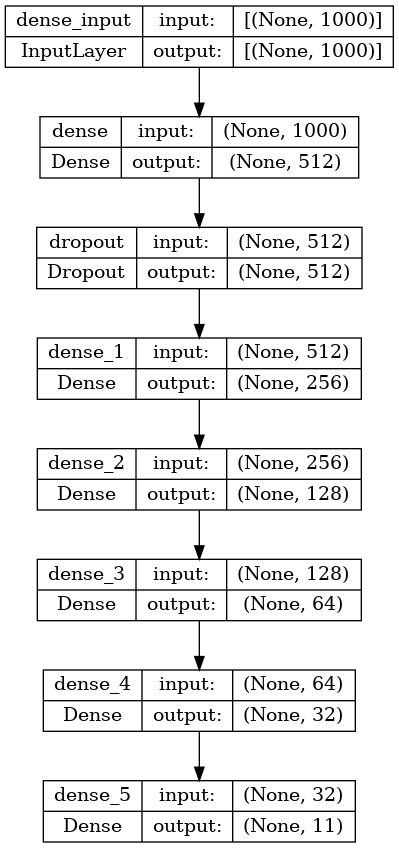

In [5]:
# Plot and save the model structure
model_structure_file = os.path.join(dir_output, 'model_structure.png')
plot_model(model, to_file=model_structure_file, show_shapes=True, show_layer_names=True)
print(f"Model structure saved to: {model_structure_file}")
display(Image(filename=model_structure_file))

# Plot the loss curve of the training process

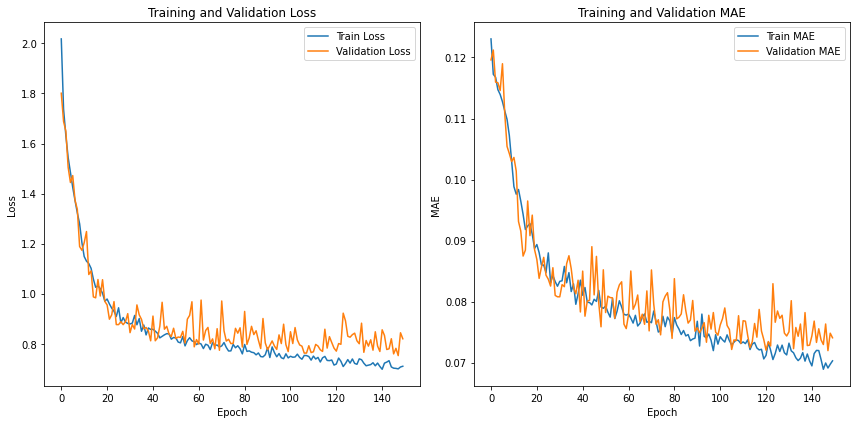

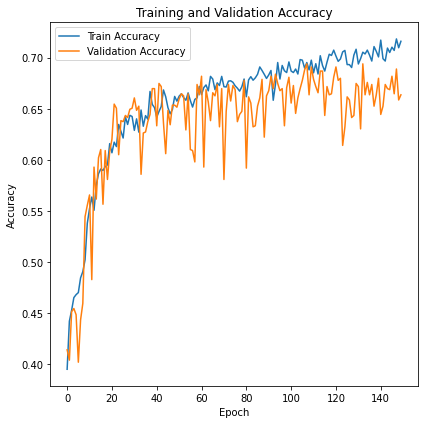

In [6]:
# Plot the fitting curve and training curve
plt.figure(figsize=(12, 6))
# Plot training loss and validation loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
# Plot training MAE and validation MAE
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.tight_layout()
plt.savefig(os.path.join(dir_output, 'training_validation_metrics.png'))
plt.show()
# Plot training accuracy and validation accuracy
plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.savefig(os.path.join(dir_output, 'training_validation_metrics_classification.png'))
plt.show()

# Predict and calculate accuracy

## Prediction and Comparison:
- The trained model is used to predict the class probabilities for the test set (`X_test`).
- `y_test_classes`: The true class labels are converted from one-hot encoding to class indices, adjusted by `min_label`.
- `y_pred_classes`: The predicted class labels are derived by selecting the class with the highest probability from the model’s output.

## Accuracy Calculation:
- The accuracy is computed using `accuracy_score` by comparing the true and predicted class labels.

## Evaluation Metrics:
- **Mean Squared Error (MSE)**: Measures the average squared differences between true and predicted class labels.
- **R² Score**: Indicates the proportion of variance explained by the model; the closer to 1, the better.

## Save Predictions:
- The predicted class labels (`y_pred_classes`) are saved into a CSV file (`predictions_classification.csv`).

## Confusion Matrix:
- A confusion matrix is created to assess the model’s performance by showing the counts of true vs. predicted labels.
- The matrix is visualized with a heatmap, saved as `confusion_matrix.png`.

## Classification Report:
- A classification report is generated, displaying precision, recall, f1-score, and support for each class.
- The report is saved as `classification_report_classification.txt`.

## Plot True vs Predicted Values:
- A plot comparing true values (`y_test_classes`) and predicted values (`y_pred_classes`) is generated.
- The plot is saved as `true_vs_predicted_classification.png`.

## Output Files:
- **Predictions**: `predictions_classification.csv`
- **Confusion Matrix**: `confusion_matrix.png`
- **Classification Report**: `classification_report_classification.txt`
- **True vs Predicted Plot**: `true_vs_predicted_classification.png`


16/16 [==============================] - 0s 3ms/step


Test accuracy: 0.684848
Test MSE: 0.505051
Test R² Score: 0.940752


Test accuracy: 0.684848
Test MSE: 0.505051
Test R² Score: 0.940752


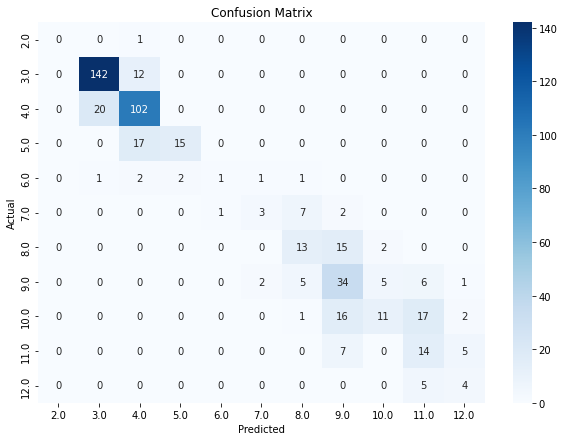

/home/dell-hd/xraylarch/envs/hanxue2/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dell-hd/xraylarch/envs/hanxue2/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dell-hd/xraylarch/envs/hanxue2/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

              precision    recall  f1-score   support

         2.0       0.00      0.00      0.00         1
         3.0       0.87      0.92      0.90       154
         4.0       0.76      0.84      0.80       122
         5.0       0.88      0.47      0.61        32
         6.0       0.50      0.12      0.20         8
         7.0       0.50      0.23      0.32        13
         8.0       0.48      0.43      0.46        30
         9.0       0.46      0.64      0.54        53
        10.0       0.61      0.23      0.34        47
        11.0       0.33      0.54      0.41        26
        12.0       0.33      0.44      0.38         9

    accuracy                           0.68       495
   macro avg       0.52      0.44      0.45       495
weighted avg       0.70      0.68      0.67       495



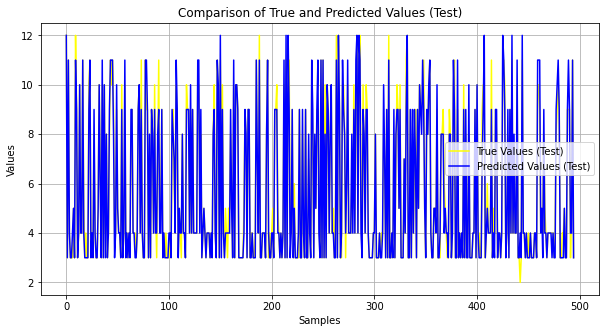

In [7]:
# Predict test set
y_pred_proba = model.predict(X_test)
y_test_classes = np.argmax(y_test, axis=1) + min_label
y_pred_classes = np.argmax(y_pred_proba, axis=1)+min_label
test_accuracy = accuracy_score(y_test_classes, y_pred_classes)
print(f"Test accuracy: {test_accuracy:.6f}")
logging.info(f"Test accuracy: {test_accuracy:.6f}")
mse = mean_squared_error(y_test_classes, y_pred_classes)
r2 = r2_score(y_test_classes, y_pred_classes)
print(f"Test MSE: {mse:.6f}")
print(f"Test R² Score: {r2:.6f}")
logging.info(f"Test MSE: {mse:.6f}")
logging.info(f"Test R² Score: {r2:.6f}")
# Save the prediction results
np.savetxt(os.path.join(dir_output, 'predictions_classification.csv'), y_pred_classes, delimiter=',', fmt='%d')
# Save the actual prediction comparison
#comparison = np.stack(y_test, y_pred_classes)
#np.savetxt(os.path.join(dir_output, 'true_vs_predicted_classification.csv'), comparison, delimiter=',', fmt='%d', header='True,Predicted')
# Save the actual prediction comparison
comparison = np.stack((y_test_classes, y_pred_classes), axis=-1)
np.savetxt(os.path.join(dir_output, 'true_vs_predicted_classification.csv'), comparison, delimiter=',', fmt='%d', header='True,Predicted')
# Plot the confusion matrix
cm = confusion_matrix(y_test_classes, y_pred_classes)
labels = np.arange(min_label, min_label + cm.shape[0])
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.savefig(os.path.join(dir_output, 'confusion_matrix.png'))
plt.show()
# Print classification report
report = classification_report(y_test_classes, y_pred_classes)
print(report)
# Save classification report
report_path = os.path.join(dir_output, 'classification_report_classification.txt')
with open(report_path, 'w') as f:
    f.write(report)
# Draw a comparison chart of the predicted results and the actual values
plt.figure(figsize=(10, 5))
plt.plot(y_test_classes,label='True Values (Test)', color='yellow', linewidth=1.5)
plt.plot(y_pred_classes, label='Predicted Values (Test)', color='blue', linewidth=1.5)
plt.xlabel('Samples')
plt.ylabel('Values')
plt.title('Comparison of True and Predicted Values (Test)')
plt.legend()
plt.grid(True)
plt.savefig(os.path.join(dir_output, 'true_vs_predicted_classification.png'))
plt.show()


